In [1]:
import numpy as np
import pandas as pd
import os.path as path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import scipy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate
import sys   
import struct
import matplotlib.pyplot as plt
from keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from scipy import ndimage
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tensorflow.keras import layers
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
import sklearn
import matplotlib
print(matplotlib.__version__)
print(sklearn.__version__)

2.12.0
1.23.5
2.0.3
3.7.2
1.2.2


In [42]:
def oneHot(y, index, c = 6):
    Y = np.zeros((len(y),c))
    for i in range(len(y)):
        Y[i, index] = y[i]
    return Y

def slicing(x, samples):
    valx = []
    valy = []
    for i in range(0,len(x),len(x)//(samples)):
        if len(x[i:i+300,:]) == 300:
            valx.append(x[i:i+300,:])
            valy.append(1)
    return np.array(valx), np.array(valy)

def unpack(path):
    with open((f"{path}"), "rb") as f:
        binary_data = f.read()

    data = struct.unpack('h' * (len(binary_data) // 2), binary_data)
    data = np.reshape(data,(-1,6))
    return data

def normalizer(x):
    x = x-np.min(x)
    x = x/(np.max(x)-np.min(x))
    return x

l = unpack("/kaggle/input/static-database/R_L.BIN")
print(np.shape(l))

z = unpack("/kaggle/input/tempdata1/slantData.BIN")
z = z[:]
df = pd.read_csv("/kaggle/input/tempdata1/slantDetectionold300.csv")
df = np.array(df)
print(f"shape of csv is {np.shape(df)}")

(664000, 6)
shape of csv is (3199, 3)


The shape of DTW values is (2906,)
The shape of data values is (2906, 300, 6)


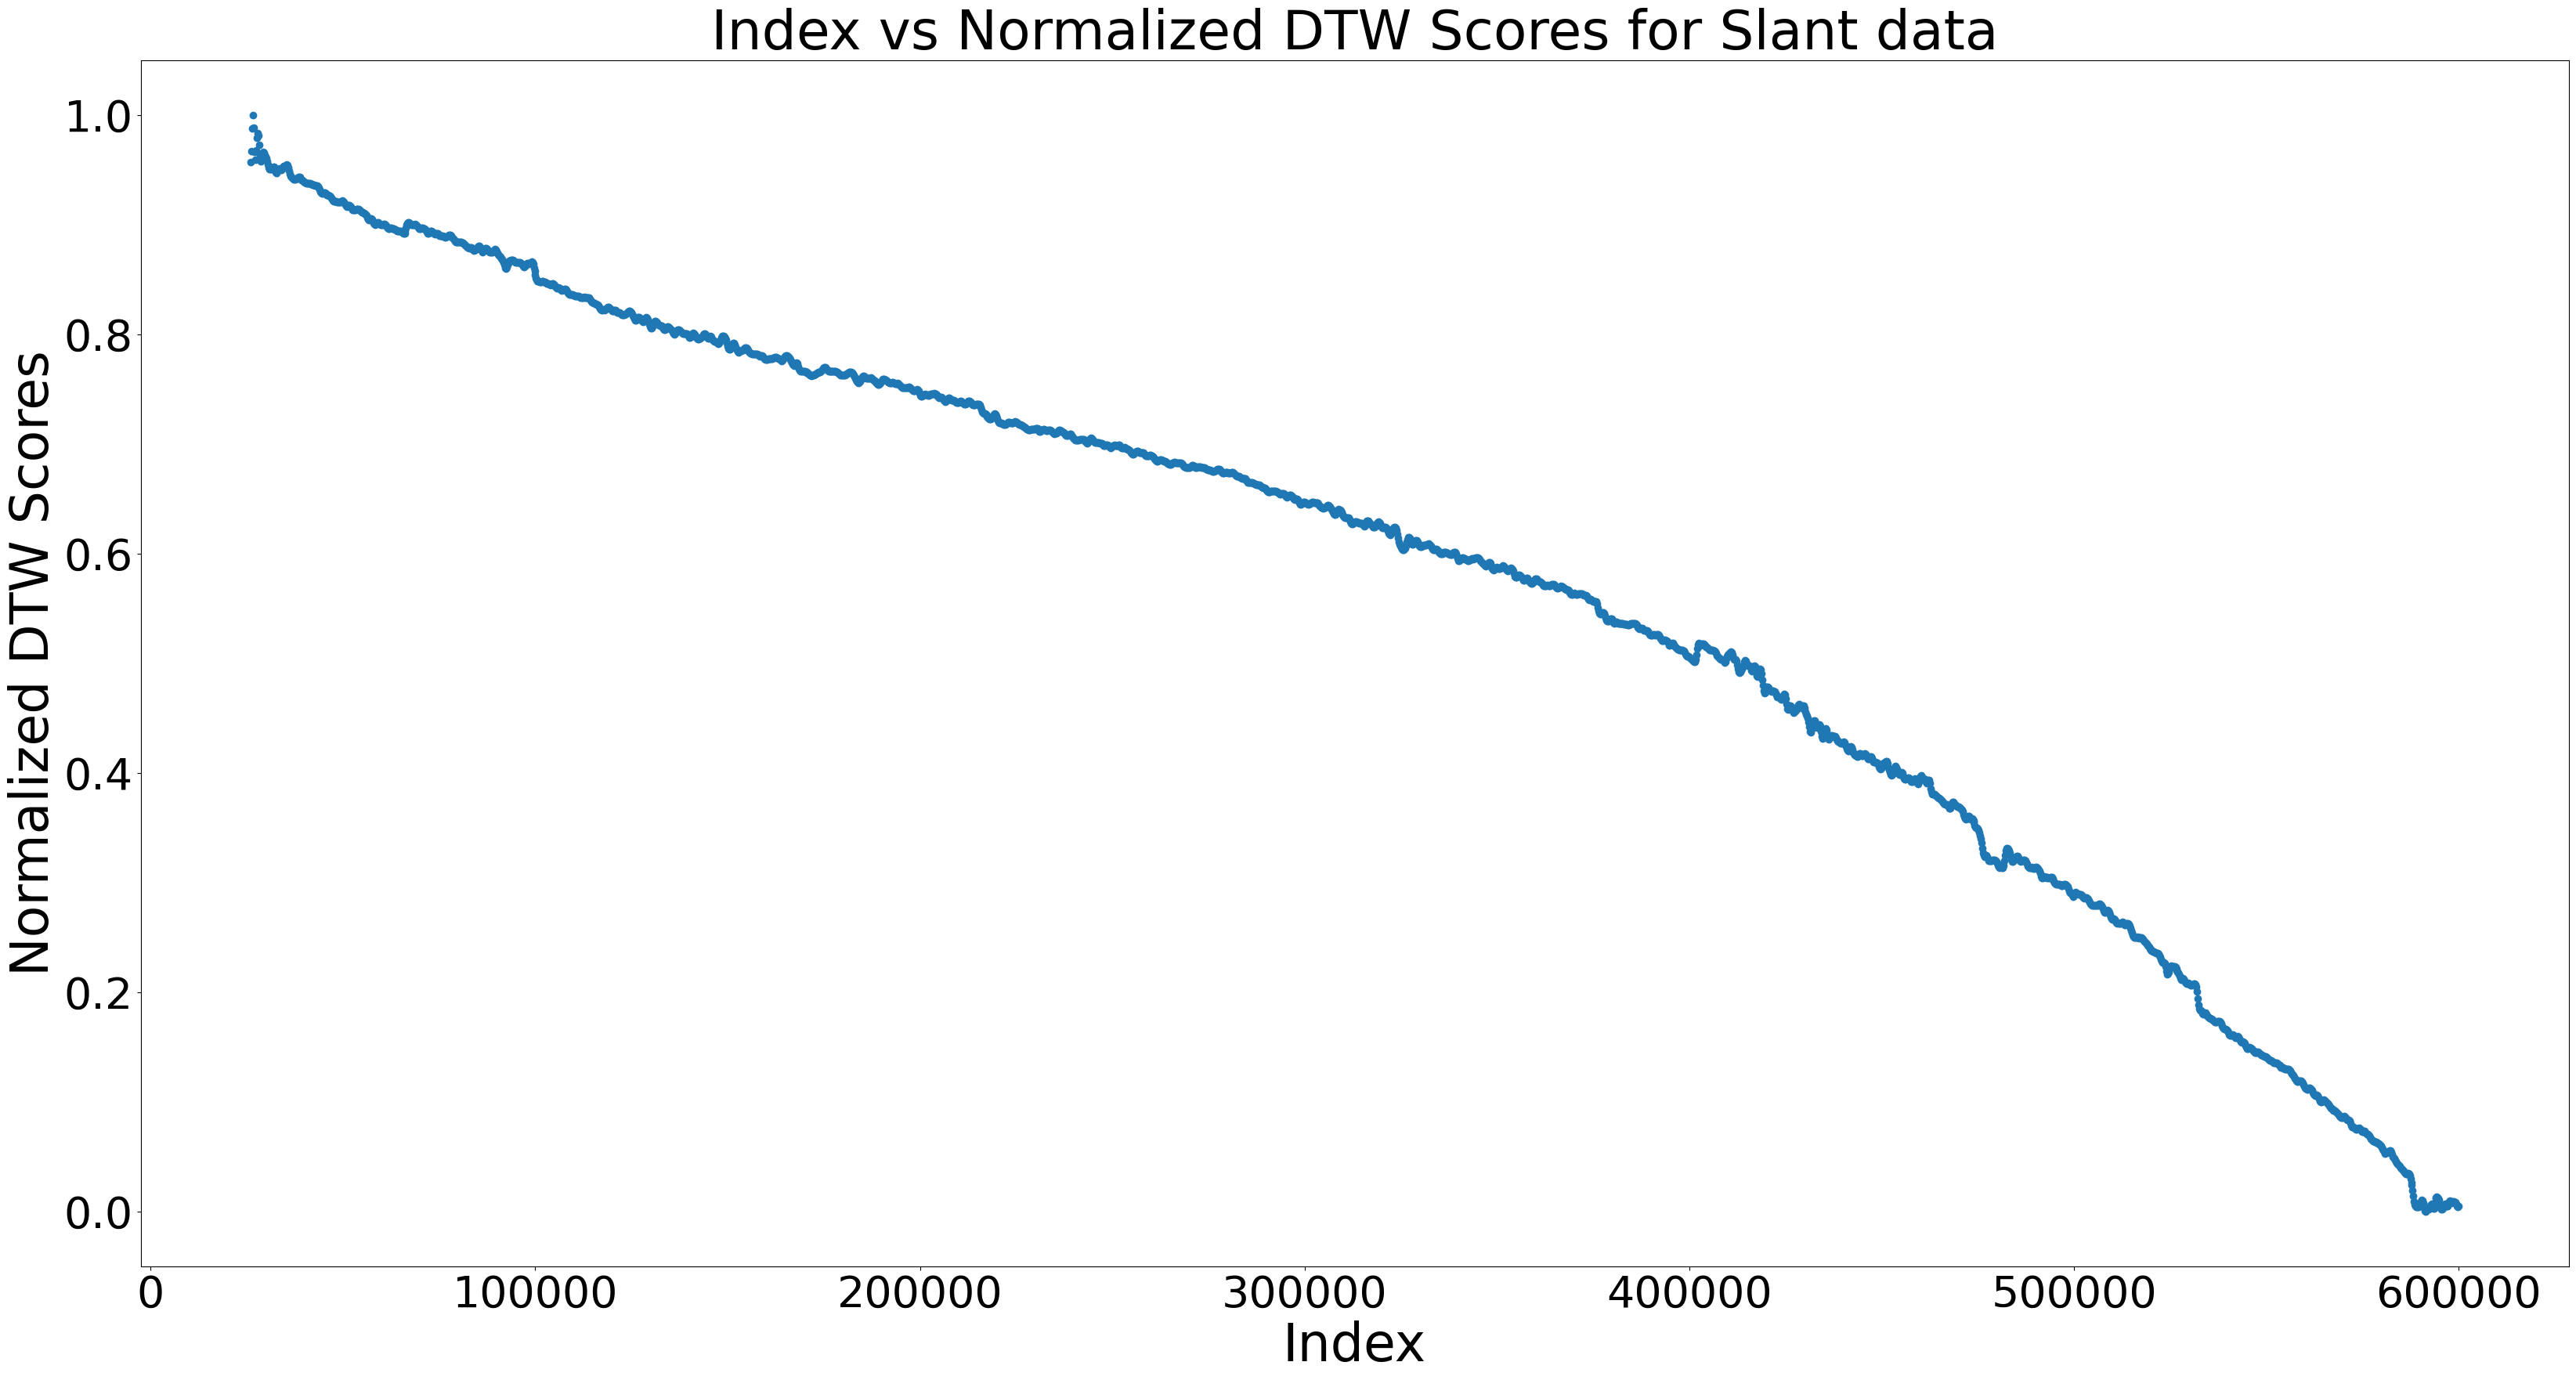

done


In [43]:
dist = []
data = []
a = []
b = []
for i in range(len(df)):
    if df[i,1]>=26000 and df[i,1]<=600000:
        dist.append(df[i,0])#### DTW score
        b.append(df[i,0])###### DTW score

        data.append(z[df[i,1]:df[i,2],:])#### sensor data
        a.append(df[i,1])#################### starting index of data
        
print(f"The shape of DTW values is {np.shape(dist)}")
print(f"The shape of data values is {np.shape(data)}")

dtw = (b-np.min(b))/(np.max(b) - np.min(b))##### normalized DTW scores

dic = dict(zip(dtw,data))###################### normalized DTW scores and sensor data

indexing = dict(zip(dtw,a))

xc = []
yc = []

for i in indexing:
    if np.shape(dic[i])[0] == 300:###### data len should be 300
        xc.append(dic[i])###### sensor data
        yc.append(1-i)######### normalized DTW scores

plt.rcParams['figure.figsize'] = [40, 20]
plt.scatter(a,dtw)### starting index vs normalized DTW scores

# Adding labels and title with increased font size
plt.xlabel('Index', fontsize=48)  # X-axis label
plt.ylabel('Normalized DTW Scores', fontsize=48)  # Y-axis label
plt.title('Index vs Normalized DTW Scores for Slant data', fontsize=50)  # Chart title

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()        

yc = normalizer(yc)
del dic
del indexing
del a
del b
del dist
del data
del dtw
print("done")

(664000, 6)
shape of csv is (2999, 3)
The shape of DTW values is (2999,)
The shape of data values is (2999, 300, 6)


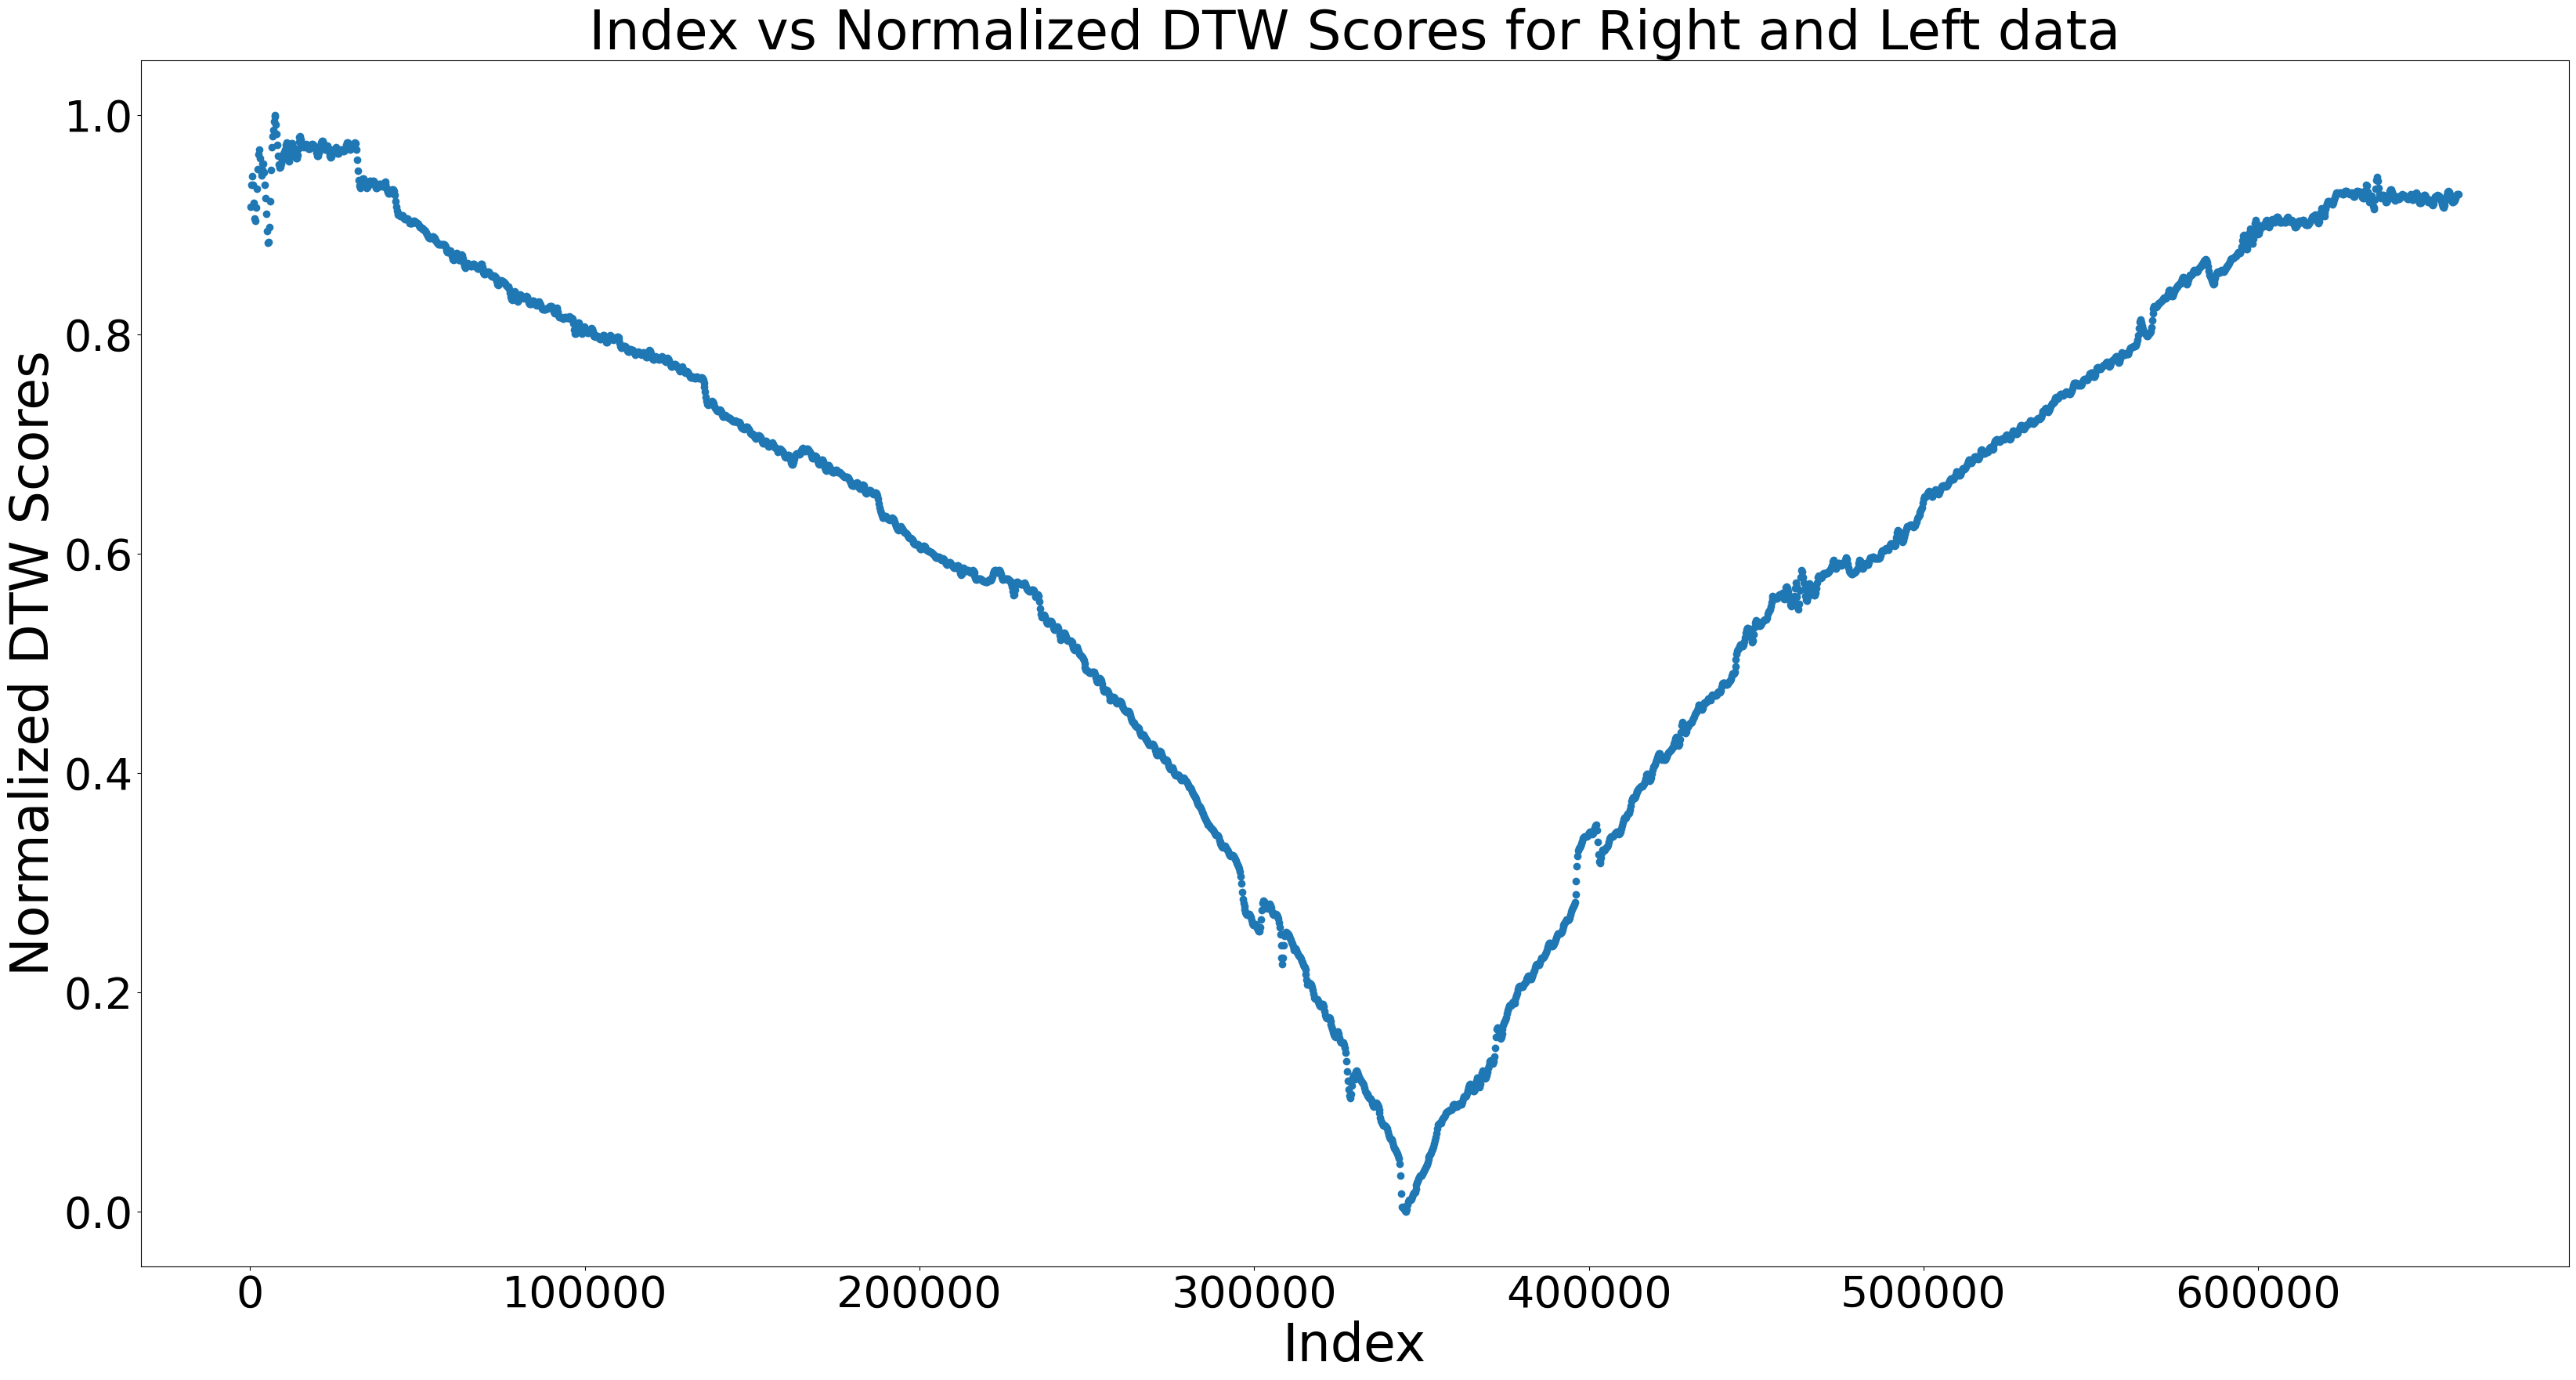

(1353, 300, 6) (1353,) (1266, 300, 6) (1266,) (2898, 300, 6) (2898,)


In [44]:
l = unpack("/kaggle/input/static-database/R_L.BIN")
print(np.shape(l))
df = pd.read_csv("/kaggle/input/static-database/orientationDetection300.csv")
df = np.array(df)
print(f"shape of csv is {np.shape(df)}")
# print(df)

dist = []
data = []
a = []
b = []
for i in range(len(df)):
#     if np.shape(l[arr[i,1]:arr[i,2],:])[0] == 12000:
    dist.append(df[i,0])
    b.append(df[i,0])

    data.append(l[df[i,1]:df[i,2],:])
    a.append(df[i,1])
print(f"The shape of DTW values is {np.shape(dist)}")
print(f"The shape of data values is {np.shape(data)}")
# dist.sort()
# print(dist)

dtw = (b-np.min(b))/(np.max(b) - np.min(b))
# plt.rcParams['figure.figsize'] = [80, 15]
# plt.scatter(a,dtw)
# plt.show()

xr = []
yr = []

dic = dict(zip(dtw,data))###################### before --> L

indexing = dict(zip(dtw,a))


for i in indexing:
    if i>=0 and np.shape(dic[i])[0] == 300 and indexing[i]<300000:#######LEFT SOME RANGE #########
#         print(dic[i])
#         print(np.shape(dic[i]))
        xr.append(dic[i])
        yr.append(i)


plt.rcParams['figure.figsize'] = [40, 20]
plt.scatter(a,dtw)

# Adding labels and title with increased font size
plt.xlabel('Index', fontsize=48)  # X-axis label
plt.ylabel('Normalized DTW Scores', fontsize=48)  # Y-axis label
plt.title('Index vs Normalized DTW Scores for Right and Left data', fontsize=50)  # Chart title

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()



xl = []
yl = []

for i in indexing:
    if i>=0 and np.shape(dic[i])[0] == 300 and indexing[i]>380000:#######LEFT SOME RANGE #########
#         print(np.shape(dic[i]))
#         print(i)
        xl.append(dic[i])
        yl.append(i)

        
        
# xc = []
# yc = []

# for i in indexing:
#     if i>=0 and np.shape(dic[i])[0] == 12000 and indexing[i]<380000 and indexing[i]>300000:######THIS RANGE IS CENTER ########
# #         print(np.shape(dic[i]))
# #         print(i)
#         xc.append(dic[i])
#         yc.append(1-i)

        
        
def normalizer(x):
    x = x-np.min(x)
    x = x/(np.max(x)-np.min(x))
    return x

yl = normalizer(yl)
yr = normalizer(yr)
# yc = normalizer(yc)
print(np.shape(xr),np.shape(yr),np.shape(xl),np.shape(yl),np.shape(xc),np.shape(yc))

In [45]:
m = unpack("/kaggle/input/static-database/vertical.BIN")
print(np.shape(m))


# plt.show()
xv, yv = slicing(m,1500)

n = unpack("/kaggle/input/static-database/fallen.BIN") 
print(np.shape(n))
xf, yf = slicing(n,50)

(796000, 6)
(1420000, 6)


# dynamic from here -->

In [46]:
def unpack(path):
    with open((f"{path}"), "rb") as f:
        binary_data = f.read()

    data = struct.unpack('h' * (len(binary_data) // 2), binary_data)
    data = np.reshape(data,(-1,6))
    return data

def points(x, buff = 100):
    zeroCrossing = []
    x = np.int64(x)
    i = 0
    while i < len(x):
        if x[i] == 0:
            zeroCrossing.append(i)
            i += buff
        i+=1
    return zeroCrossing

def butterFiltering(signal, cutoff_frequency = 4000, order = 4, bigFlag = 0, pltStatus = 0):
    # Generate a sample time series signal
    fs = 6660  # Sampling frequency (Hz)
    t = np.linspace(0, len(signal), fs, endpoint=False)  # Time vector
#     print(fs)
    # Normalize the cutoff frequency
    normalized_cutoff = cutoff_frequency / (0.5 * fs)
    if bigFlag == 1:
        normalized_cutoff = 0.0004# cutoff freq = normalized freq*0.5*len(signal)

    # Design the Butterworth filter
    b, a = butter(N=order, Wn=normalized_cutoff, btype='low', analog=False, output='ba')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)
    
    if pltStatus == 1:
        %matplotlib inline
#         %matplotlib notebook
        plt.figure(figsize=(15, 8))

        plt.subplot(2, 1, 1)
        plt.plot(signal)############################## can remove this range 
        plt.title('Original Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        plt.subplot(2, 1, 2)
        plt.plot(filtered_signal)############################## can remove this range
        plt.title('Filtered Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        plt.tight_layout()
        plt.show()
    return filtered_signal


##################################################################################################################


def quadFinder(i, z, x):
    for index in range(len(z)-1):
        if i>= z[index,0] and i<= z[index+1,0]:
            val = index
#             print(f"index inside quadFinder: {index}")
#             print("it happend")
            break
        else:
            val = 0
    m = z[val,2]
    maxValue = max(x[int(z[index-1,3])], x[int(z[index,3])], x[int(z[index+1,3])])
#     print(f"val and m is {val, m}")
    if m>0:
        if i<z[val,3]:
            return 1, maxValue
        else:
            return 2, maxValue
    if m<=0:
        if i<z[val,3]:
            return 3, maxValue
        else:
            return 4, maxValue
    
def transform(sig, denominator, quad, maxValue = 1):
    denominator = abs(denominator)
    if abs(sig)> denominator:
        denominator = maxValue
    
    if quad == 1:
        return -np.arccos(sig/denominator)/np.pi*2
    if quad == 2:
        return np.arccos(sig/denominator)/np.pi*2
    if quad == 3:
        return np.arcsin(sig/denominator)/np.pi*2 + 1
    if quad == 4:
        return -np.arcsin(sig/denominator)/np.pi*2 - 1
    
    
    
def sign(i, ls, x, dist = 300):
    if np.mean(x[i:i+dist]) >= 0:
        for index in range(len(ls)-1):
            if i>=ls[index,3] and i<=ls[index+1,3]:
                if x[int(ls[index,3])] >= 0:
                    return ls[index,3]
                else:
                    return ls[index+1,3]
                
    else:
        for index in range(len(ls)-1):
            if i>=ls[index,3] and i<=ls[index+1,3]: 
                if x[int(ls[index,3])] < 0:
                    return ls[index,3]
                else:
                    return ls[index+1,3]
    return 0


def labelling(x, ls, th = 1200, dist = 300):
    ans = []
    chad = []
    for i in range(0,len(x)-dist,dist):
        maxMinIndex = sign(i+dist//2, ls, x)
        quad, maxVal = quadFinder(i + dist//2, ls, x)
#         print(quad)
        val = (np.mean(x[i:i+dist]))
        
        label = transform(val, x[int(maxMinIndex)], quad, maxVal)
#         print(val, x[int(maxMinIndex)], label)
        
        ans.append([label, i, i+dist])
#     print(len(ans))
    return np.array(ans), chad


def tableGen(newK):

    c = points(newK)## return zerocrossings

    z = np.zeros((len(c)-1,4))### table:start, end, mean, maxMinIndex
    z[:,0] = c[:-1]
    z[:,1] = c[1:]

    for i in range(len(z)):
        z[i,2] = np.mean(newK[np.int32(z[i,0]):np.int32(z[i,1])])

    for i in range(len(z)):
        if z[i,2] > 0:
            temp = newK[np.int32(z[i,0]):np.int32(z[i,1])]
            mx = np.max(temp)
            ix = np.where(temp == mx)[0]
            index = int(z[i,0]) + ix
            z[i,3] = index[0]

        if z[i,2] < 0:
            temp = newK[np.int32(z[i,0]):np.int32(z[i,1])]
            mn = np.min(temp)
            inn = np.where(temp == mn)[0]
            index = np.int32(z[i,0]) + inn
            z[i,3] = index[0]

#     print(np.shape(z))
    ans, chad = labelling(newK,z)
#     print(np.shape(ans))
    
    return ans, z, chad


**Do not delete the below shell**

In [47]:
# ################################################################################################################
# l = unpack("/kaggle/input/staticgaitclasses/-20to20StaticGait.BIN")
# print(np.shape(l))

# m = l[10000:-10000,:]
# # m = l[:,:]
# print(np.shape(m))
# k = np.array(m[:,5:6])###############################
# print(np.shape(k))
# k = np.reshape(k, (-1))

# filtered_signal = butterFiltering(k,1600,4,1,1)

# ans, z, chad = tableGen(filtered_signal)
# # print(ans)

# ############################################################################################################

# %matplotlib inline
# plt.figure(figsize = (15,6))
# x = filtered_signal
# c = points(filtered_signal)
# plt.plot(x)
# plt.scatter(z[:,3], x[np.int64(z[:,3])], label = "maxMin Values")
# plt.scatter(c,np.zeros(len(c)), label = "zero crossings")
# # plt.plot(c,np.zeros(len(c)))
# plt.plot(np.arange(len(ans)),ans[:,0])
# plt.title('Filtered Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()

# #######################################################################################################################

# %matplotlib inline
# # %matplotlib notebook
# plt.figure(figsize = (15,6))
# plt.plot(ans[500:1000,0], label = 'labeled data')
# plt.plot(x[150000:300000:300]/800, label = 'Original signal')
# # plt.plot(np.arange(len(ans)), np.zeros(len(ans)))
# plt.title('labeled points')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.grid()
# plt.ylabel('Phase (radians)')
# # plt.show()

# ######################################################################################################################

# # j = ans[:,1:]
# x = []
# for i in range(len(ans)):
#     x.append(m[int(ans[i,1]):int(ans[i,2]),:])
# y = ans[:,0]
# print(np.shape(x))
# print(np.shape(y))
# # for i in range(len(y)):
# #     print(y[i])
# x = x[50:-50]
# y = y[50:-50]
# print(np.shape(x))
# print(np.shape(y))

# x = np.array(x)
# y = np.array(y)*0.20



# ############## UNCOMMENT IF ERROR IS ENCOUNTERED #############

# # nanVal = np.isnan(y)
# # for i in range(len(nanVal)):
# #     if nanVal[i] == True:
# #         print(nanVal[i])
# #         print(i)
# #         print(y[2170])
# #         y[i] = 0


# #####################################################################################################################

# ######## THIS IS FOR THE NEW DATA WHICH IS TO BE ADDES TO THE ORIGINAL DATA ########
# l = unpack("/kaggle/input/staticgaitclasses/-40to40StaticGait.BIN")
# m = l[10000:-10000,:]
# # m = l[:,:]
# # print(np.shape(m))
# k = np.array(m[:,5:6])
# # print(np.shape(k))
# k = np.reshape(k, (-1))
# filtered_signal = butterFiltering(k,1600,4,1,1)


# ans, z, chad = tableGen(filtered_signal)

# # j = ans[:,1:]
# x2 = []
# for i in range(len(ans)):
#     x2.append(m[int(ans[i,1]):int(ans[i,2]),:])
# y2 = ans[:,0]
# # print(np.shape(x2))
# # print(np.shape(y2))
# # for i in range(len(y)):
# #     print(y[i])
# x2 = x2[50:-50]
# y2 = y2[50:-50]
# # print(np.shape(x2))
# # print(np.shape(y2))

# x2 = np.array(x2)
# y2 = np.array(y2)*0.40
# # for i in range(len(y)):
# #     if type(y[i]) != type(float):
# #         print((float(y[i])))
# #         break



# #####################################################################################################################

# # print(np.shape(x2))
# # print(np.shape(x))

# #####################################################################################################################

# print(len(x))
# # x = list(x).extend(x2)
# # y = list(y).extend(y2)
# Y = np.zeros((len(y) + len(y2)))
# X = np.zeros((len(x) + len(x2), 300, 6))
# Y[:len(y)] = y
# Y[len(y):] = y2
# X[:len(x),:,:] = x
# X[len(x):,:,:] = x2
# # print(np.shape(Y))

# # X = np.concatenate(x,x2)
# # print(np.shape(X))


# xdy = np.array(X)
# ydy = np.array(Y)

# # print(len(x))


# # xdy = np.reshape(x,(-1,300,6,1))##### FOR CNN ONLY #####
# # Xs, xTests, Ys, yTests = train_test_split(x, y, test_size=0.20, shuffle = True)
# # Xs, xVals, Ys, yVals = train_test_split(X, Y, test_size=0.20, shuffle = True)

In [48]:
######## THIS IS FOR THE NEW DATA WHICH IS TO BE ADDES TO THE ORIGINAL DATA ########
def allCode(path, peakVal, cutoff):
    l = unpack(f"{path}")
    print(np.shape(l))

    m = l[40000:-10000,:]
    # m = l[:,:]
#     print(np.shape(m))
    k = np.array(m[:,5:6])###############################
#     print(np.shape(k))
    k = np.reshape(k, (-1))

    filtered_signal = butterFiltering(k,cutoff,4,0,0)#(signal, cutoff_frequency, order, bigFlag, pltStatus):

    ans, z, chad = tableGen(filtered_signal)

    x = []
    for i in range(len(ans)):
        x.append(m[int(ans[i,1]):int(ans[i,2]),:])
    y = ans[:,0]
#     print(np.shape(x))
#     print(np.shape(y))
    # for i in range(len(y)):
    #     print(y[i])
    x = x[50:-50]
    y = y[50:-50]
#     print("the size of x and y is:")
#     print(np.shape(x))
#     print(np.shape(y))

    x = np.array(x)
    y = np.array(y)*peakVal
#     plt.plot(y)
    return x, y

x1r, y1r = allCode("/kaggle/input/long-data-dynamic/long_data/10_r.BIN", .10, cutoff = 2)
x1l, y1l = allCode("/kaggle/input/long-data-dynamic/long_data/10_l.BIN", .10, cutoff = 2)

y1 = np.concatenate([y1r, y1l]).tolist()
x1 = np.concatenate([x1r, x1l], axis = 0).tolist()

x2r, y2r = allCode("/kaggle/input/long-data-dynamic/long_data/20_r.BIN", .20, cutoff = 1.3)
x2l, y2l = allCode("/kaggle/input/long-data-dynamic/long_data/20_l.BIN", .20, cutoff = 1.3)

y2 = np.concatenate([y2r, y2l]).tolist()
x2 = np.concatenate([x2r, x2l], axis = 0).tolist()

x3r, y3r = allCode("/kaggle/input/long-data-dynamic/long_data/30_r.BIN", .30, cutoff = 1)
x3l, y3l = allCode("/kaggle/input/long-data-dynamic/long_data/30_l.BIN", .30, cutoff = 1)

y3 = np.concatenate([y3r, y3l]).tolist()
x3 = np.concatenate([x3r, x3l], axis = 0).tolist()

x4, y4 = allCode("/kaggle/input/newdatadynamic/DATASET/40.BIN", .40, cutoff = 1)
# x3 = x3[100:-100,:,:]
# y3 = y3[100:-100]
print(np.shape(x3))
print("done!!")

(1680000, 6)
(1224000, 6)
(1704000, 6)
(1112000, 6)


/tmp/ipykernel_32/566883051.py:92: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(sig/denominator)/np.pi*2


(1704000, 6)
(1312000, 6)
(532000, 6)


/tmp/ipykernel_32/566883051.py:96: RuntimeWarning: invalid value encountered in arcsin
  return -np.arcsin(sig/denominator)/np.pi*2 - 1


(9519, 300, 6)
done!!


## **Callback funcitons**

In [49]:
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy',min_delta=0.01)

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []



    def on_epoch_end(self, epoch, logs={}):

        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
        
        
checkpoint_callback_for_router = ModelCheckpoint(
    filepath='router.h5',      # Path where the model will be saved
    monitor='val_accuracy',            # Metric to monitor
    mode='max',                    # Mode: 'min' means save the model when the monitored metric decreases
    save_best_only=True,           # Save only the best model
    verbose=1                      # Verbosity mode (1 means logs will be shown)
)

callbacks_list = [PlotLearning(), checkpoint_callback_for_router]#>>>>>>>>>>early_stopping

In [50]:
def flagAdder(ydy):
    res = np.ones((np.shape(ydy)[0], np.shape(ydy)[1]))
    res[:,:-1] = ydy[:,:-1]
    return res


# x = []
# y = []
print(np.shape(x1))

# Y = np.concatenate([y1[:1000], y2[:2000], y3[:2000], y4]).tolist()
# X = np.concatenate([x1[:1000][:][:], x2[:2000][:][:], x3[:2000][:][:], x4], axis = 0).tolist()

Y = np.concatenate([y2[:5000], y3[:5000], y4]).tolist()
X = np.concatenate([x2[:5000][:][:], x3[:5000][:][:], x4], axis = 0).tolist()

print(np.shape(X))


xdy = np.array(X)
ydy = np.array(Y)

(9146, 300, 6)
(11506, 300, 6)


## **Grokfast**

In [51]:
# Helper function
def exists(val):
    return val is not None

class GrokFastAdamW(tf.keras.optimizers.legacy.Optimizer):
    def __init__(
        self,
        learning_rate=1e-4,
        betas=(0.9, 0.99),
        weight_decay=0.,
        epsilon=1e-8,
        regen_reg_rate=0.,
        grokfast=True,
        grokfast_alpha=0.98,
        grokfast_lamb=2.,
        grokfast_after_step=0,
        normalize_lr=True,
        name='GrokFastAdamW',
        **kwargs
    ):
        if grokfast and normalize_lr:
            learning_rate /= (1. + grokfast_lamb)
        self._init_lr = learning_rate

        # Validate hyperparameters
        assert learning_rate > 0.
        assert all([0. <= beta <= 1. for beta in betas])
        assert weight_decay >= 0.
        assert regen_reg_rate >= 0.
        assert epsilon > 0.
        assert not (weight_decay > 0. and regen_reg_rate > 0.), \
            'Weight decay and regenerative regularization cannot be used together'

        # Initialize using the legacy optimizer's __init__
        super().__init__(name=name, **kwargs)
        self._set_hyper("learning_rate", learning_rate)
        self._set_hyper("beta_1", betas[0])
        self._set_hyper("beta_2", betas[1])
        self._set_hyper("epsilon", epsilon)
        self.weight_decay = weight_decay
        self.regen_reg_rate = regen_reg_rate
        self.grokfast = grokfast
        self.grokfast_alpha = grokfast_alpha
        self.grokfast_lamb = grokfast_lamb
        self.grokfast_after_step = grokfast_after_step

    def _create_slots(self, var_list):
        for var in var_list:
            self.add_slot(var, 'm')  # First moment
            self.add_slot(var, 'v')  # Second moment
            if self.regen_reg_rate > 0.:
                self.add_slot(var, 'param_init', initializer=var)
            if self.grokfast:
                self.add_slot(var, 'grok_exp_avg', initializer='zeros')

    def turn_on_grokfast(self):
        self.grokfast = True

    def turn_off_grokfast(self):
        self.grokfast = False

    def clear_grokfast_state(self, var_list):
        for var in var_list:
            if self.has_slot(var, 'grok_exp_avg'):
                grok_exp_avg = self.get_slot(var, 'grok_exp_avg')
                grok_exp_avg.assign(tf.zeros_like(var))

    @tf.function
    def _resource_apply_dense(self, grad, var):
        var_dtype = var.dtype.base_dtype

        lr_t = self._decayed_lr(var_dtype)
        beta1_t = self._get_hyper("beta_1", var_dtype)
        beta2_t = self._get_hyper("beta_2", var_dtype)
        epsilon_t = self._get_hyper("epsilon", var_dtype)
        weight_decay_t = tf.convert_to_tensor(self.weight_decay, var_dtype)
        regen_reg_rate_t = tf.convert_to_tensor(self.regen_reg_rate, var_dtype)
        grokfast_alpha_t = tf.convert_to_tensor(self.grokfast_alpha, var_dtype)
        grokfast_lamb_t = tf.convert_to_tensor(self.grokfast_lamb, var_dtype)
        grokfast_after_step_t = tf.cast(self.grokfast_after_step, var_dtype)
        grokfast_bool_t = tf.convert_to_tensor(self.grokfast, dtype=tf.bool)

        m = self.get_slot(var, 'm')
        v = self.get_slot(var, 'v')
        t = tf.cast(self.iterations + 1, var_dtype)

        # Apply weight decay
        if self.weight_decay > 0.:
            var.assign_sub((lr_t / self._init_lr) * weight_decay_t * var)

        # Apply regenerative regularization
        if self.regen_reg_rate > 0.:
            param_init = self.get_slot(var, 'param_init')
            var.assign((1 - (lr_t / self._init_lr) * regen_reg_rate_t) * var +
                       ((lr_t / self._init_lr) * regen_reg_rate_t) * param_init)

        # Update biased first moment estimate
        m_t = beta1_t * m + (1 - beta1_t) * grad
        # Update biased second raw moment estimate
        v_t = beta2_t * v + (1 - beta2_t) * tf.square(grad)

        # Compute bias-corrected first and second moment estimates
        m_corr = m_t / (1 - tf.pow(beta1_t, t))
        v_corr = v_t / (1 - tf.pow(beta2_t, t))

        # Determine if grokfast should be applied
        should_grokfast = tf.logical_and(
            grokfast_bool_t,
            tf.logical_and(t > grokfast_after_step_t, grokfast_lamb_t > 0)
        )

        # Apply grokfast adjustments
        if should_grokfast:
            grok_exp_avg = self.get_slot(var, 'grok_exp_avg')
            grok_exp_avg.assign(
                grokfast_alpha_t * grok_exp_avg + (1 - grokfast_alpha_t) * grad
            )
            grad = grad + grokfast_lamb_t * grok_exp_avg

        # Compute the update
        update = -lr_t * m_corr / (tf.sqrt(v_corr) + epsilon_t)

        # Apply the update
        var.assign_add(update)

        # Update the moments
        m.assign(m_t)
        v.assign(v_t)

    def _resource_apply_sparse(self, grad, var, indices):
        # Sparse updates are not implemented for this optimizer
        raise NotImplementedError("Sparse gradient updates are not supported.")

    def get_config(self):
        config = super().get_config()
        config.update({
            'learning_rate': self._serialize_hyperparameter("learning_rate"),
            'beta_1': self._serialize_hyperparameter("beta_1"),
            'beta_2': self._serialize_hyperparameter("beta_2"),
            'epsilon': self._serialize_hyperparameter("epsilon"),
            'weight_decay': self.weight_decay,
            'regen_reg_rate': self.regen_reg_rate,
            'grokfast': self.grokfast,
            'grokfast_alpha': self.grokfast_alpha,
            'grokfast_lamb': self.grokfast_lamb,
            'grokfast_after_step': self.grokfast_after_step,
            'normalize_lr': False,  # Assuming normalize_lr is handled internally
        })
        return config
optimizer = keras.optimizers.Adam(learning_rate=0.002, clipvalue=0.2)#
custom_optimizer = GrokFastAdamW(learning_rate=0.002, betas=(0.9, 0.99))

## **Positional Embeddings**

In [52]:
def get_positional_embeddings(sequence_length, embed_dim):
    position_encodings = np.zeros((sequence_length, embed_dim))
    for pos in range(sequence_length):
        for i in range(0, embed_dim, 2):
            position_encodings[pos, i] = np.sin(pos / (10000 ** (i / embed_dim)))
            position_encodings[pos, i + 1] = np.cos(pos / (10000 ** (i / embed_dim)))
            
#     print(position_encodings)
    return position_encodings


class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, **kwargs):
        super(TokenAndPositionEmbedding, self).__init__(**kwargs)

    def call(self, x):

        return x + get_positional_embeddings(300, 6)


## **Attention Block**

In [53]:

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation=tf.keras.activations.gelu), layers.Dense(embed_dim),])
        self.layernorm = layers.LayerNormalization()
        self.batchnorm = layers.BatchNormalization()


    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm(inputs + attn_output)
        ffn_output = self.ffn(out1)
        return self.batchnorm(out1 + ffn_output)

# Router

In [54]:

inputs = layers.Input(shape=(300,6))
embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention


# def someModel(inputs):
embed_dim = 6  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(300,6))
embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
# transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

x = layers.BatchNormalization()(inputs)

x = embedding_layer(x)
# x = transformer_block(x)

x = tf.expand_dims(x, 3)


x = layers.Conv2D(16, kernel_size=(6,6), strides=(4, 3))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Conv2D(32, kernel_size=(4,1), strides=(3, 1))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Conv2D(64, kernel_size=(3,1), strides=(2, 1))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)


x = layers.Flatten()(x)


x = layers.Dense(16)(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Dense(8)(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Dense(5)(x)
x = layers.BatchNormalization()(x)
outputs = Activation('softmax')(x)


router = keras.Model(inputs=inputs, outputs=outputs)
router.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 300, 6)]          0         
                                                                 
 batch_normalization_40 (Bat  (None, 300, 6)           24        
 chNormalization)                                                
                                                                 
 token_and_position_embeddin  (None, 300, 6)           0         
 g_9 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 tf.expand_dims_6 (TFOpLambd  (None, 300, 6, 1)        0         
 a)                                                              
                                                                 
 conv2d_19 (Conv2D)          (None, 74, 1, 16)         592 

In [55]:
from tensorflow.keras.losses import Loss

class WeightedCategoricalCrossentropy(Loss):
    def __init__(self, weights, name="weighted_categorical_crossentropy", reduction=tf.keras.losses.Reduction.AUTO):
        super(WeightedCategoricalCrossentropy, self).__init__(name=name, reduction=reduction)
        # Ensure weights are a TensorFlow constant tensor
        if not isinstance(weights, tf.Tensor):
            weights = tf.constant(weights, dtype=tf.float32)
        self.initial_weights = weights

    def call(self, y_true, y_pred):
        # Cast y_true to float32 for compatibility
        y_true = tf.cast(y_true, tf.float32)
        
        # Calculate standard categorical crossentropy
        cce = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
        scaled_loss = cce * tf.reduce_sum(y_true * self.initial_weights, axis=-1)
        
        # Return the mean of the scaled loss
        return tf.reduce_mean(scaled_loss)

    def get_config(self):
        # Serialize the configuration of the loss, including the weights
        config = super(WeightedCategoricalCrossentropy, self).get_config()
        config['weights'] = self.initial_weights.numpy().tolist()  # Store weights as a list for serialization
        return config

    @classmethod
    def from_config(cls, config):
        # Deserialize the custom loss from its configuration
        weights = config.pop('weights', [  1.2,   7.1,  16.0, 144.3])  # Provide default weights if not in the config
        return cls(weights=tf.constant(weights, dtype=tf.float32), **config)

    
# # Weights for each category
# # weights = [1, 1, 1, 1]
# lst = [0,0,0,0]
# for i in range(len(ydy)):
#     if ydy[i]<0.1:
#         lst[0]+=1
#     elif ydy[i]<0.2:
#         lst[1]+=1
#     elif ydy[i]<0.3:
#         lst[2]+=1
#     else:
#         lst[3]+=1
# scalor = np.array(lst)/len(ydy)
# weights=1/scalor
# scaledWeights = weights/sum(weights)
# print(scalor)
# print(weights)
# print(scaledWeights)

In [56]:

print(ydy[:10])

def routerTrain(xdy, ydy, router):
    routerY = []
    for i in range(len(ydy)):
        if abs(y[i])<0.1:
            routerY.append([1,0,0,0])
        elif abs(ydy[i])<0.2:
            routerY.append([0,1,0,0])
        elif abs(ydy[i])<0.3:
            routerY.append([0,0,1,0])
        else:
            routerY.append([0,0,0,1])
    routerY = np.array(routerY)
    X, xVal, Y, yVal = train_test_split(xdy, routerY, test_size=0.40, shuffle = True)

    optimizer = keras.optimizers.Adam(learning_rate=0.02, clipvalue=0.05)

    router.compile(loss=WeightedCategoricalCrossentropy(scaledWeights), optimizer=custom_optimizer, metrics=["accuracy"])

    router.fit(X, Y, epochs=200,batch_size = 6000, validation_data = (xVal, yVal), callbacks=callbacks_list)
    return router
# router = routerTrain(xdy, ydy, router)

# router.save('bestRouter.h5')


[ 0.19255453  0.15297706  0.11331454  0.07373224  0.03485075 -0.01351665
 -0.04831308 -0.08744046 -0.1267826  -0.16596393]


In [57]:
# def routerVal(xdy, ydy, router):
#     routerY = []
#     for i in range(len(ydy)):
#         if abs(ydy[i])<0.1:
#             routerY.append([1,0,0,0])
#         elif abs(ydy[i])<0.2:
#             routerY.append([0,1,0,0])
#         elif abs(ydy[i])<0.3:
#             routerY.append([0,0,1,0])
#         else:
#             routerY.append([0,0,0,1])
#     routerY = np.array(routerY)
#     X, xVal, Y, yVal = train_test_split(xdy, routerY, test_size=0.10, shuffle = True)
#     predicted = router(xVal)
#     confusion_matrix = metrics.confusion_matrix(yVal.argmax(axis=1), np.array(predicted).argmax(axis=1))
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
#     cm_display.plot()
#     plt.show()


#     accuracy = accuracy_score(yVal.argmax(axis=1), np.array(predicted).argmax(axis=1))

#     print(f"Accuracy: {accuracy * 100:.2f}%")
# #     router.summary()
#     return router


# router = router
# router.load_weights('/kaggle/input/router/bestRouter.h5')

# router = routerVal(xdy, ydy, router)

## **Custom layer for model prediction**

In [58]:
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='GlorotNormal',
                                      name='kernel')
        self.bias = self.add_weight(shape=(self.units,),
                                    initializer='GlorotNormal',
                                    name='bias')

    def call(self, inputs):
        z = tf.matmul(inputs, self.kernel) + self.bias
        
        # Split 'z' into 6 parts and apply different activations
        z1, z2, z3, z4, z5, z6 = tf.split(z, num_or_size_splits=6, axis=1)
        a1 = tf.nn.sigmoid(z1)  # Apply Sigmoid to first part
        a2 = tf.nn.sigmoid(z2)  # Apply Sigmoid to second part
        a3 = tf.nn.sigmoid(z3)  # Apply Sigmoid to third part
        a4 = tf.nn.sigmoid(z4)  # Apply Sigmoid to fourth part
        a5 = tf.nn.tanh(z5)     # Apply Tanh to fifth part
        a6 = tf.nn.sigmoid(z6)  # Apply Sigmoid to sixth part
        
        # Concatenate back the activated parts
        return tf.concat([a1, a2, a3, a4, a5, a6], axis=1)


## **Concatenation of One-Hot Encoding of data for legacy models**

(18525, 6)


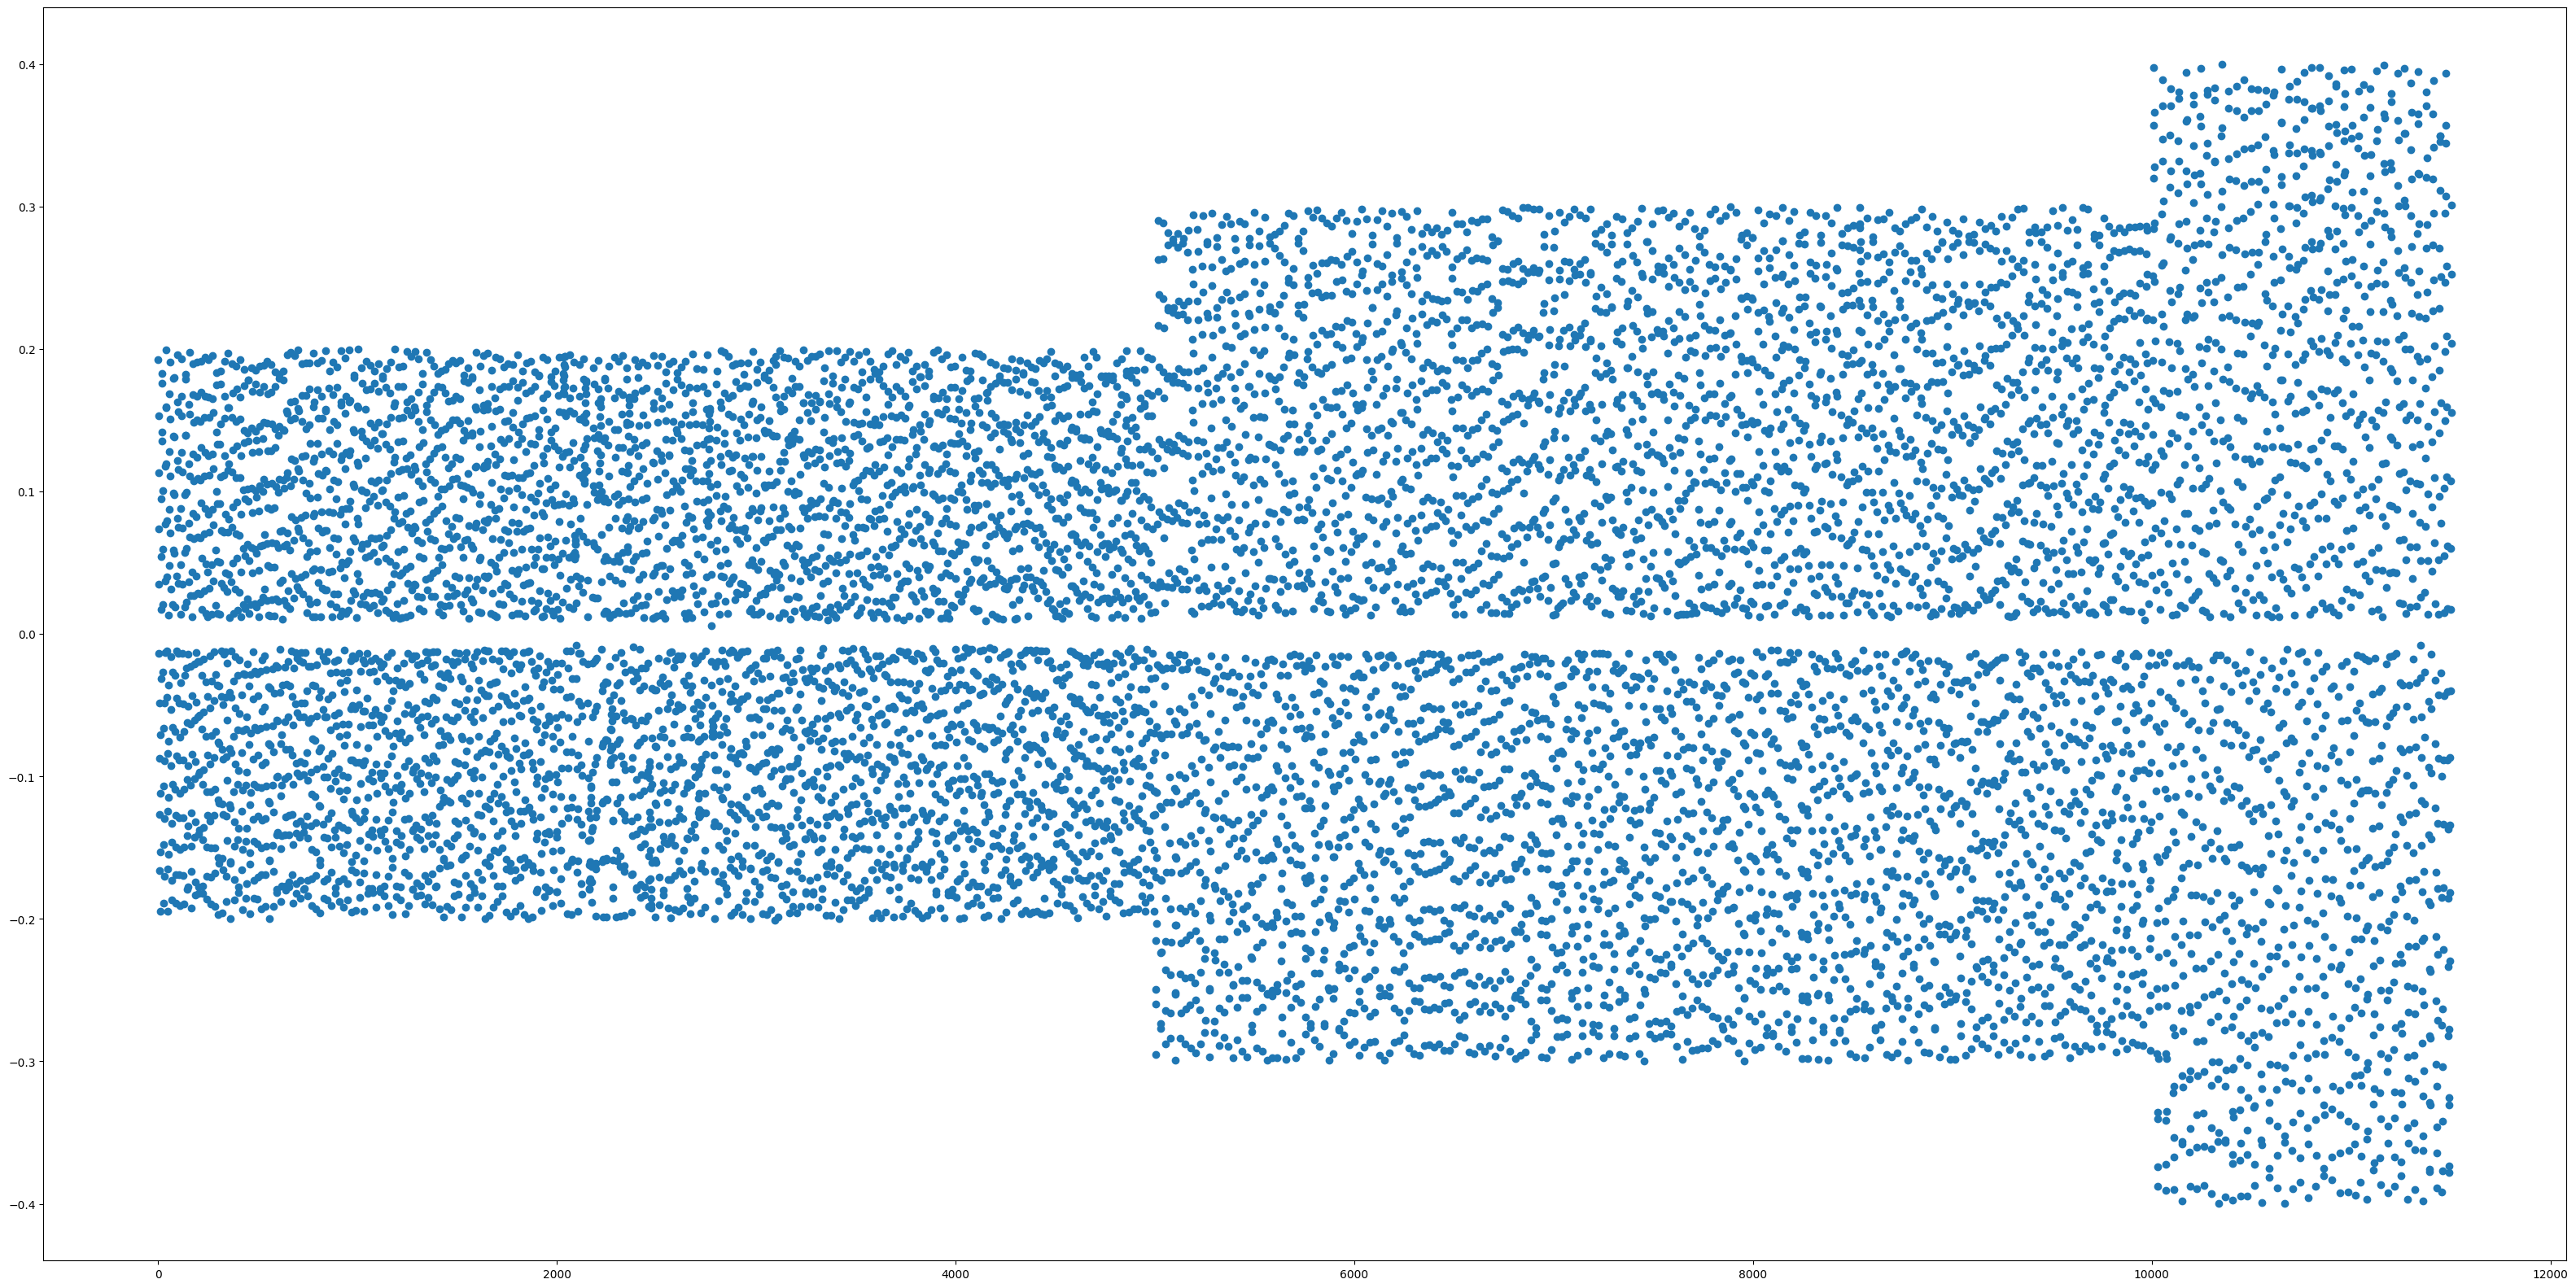

In [59]:
x = np.concatenate([xc, xr, xl, xv, xdy], 0)########XF REMOVED #######
x = np.reshape(x,(-1,300,6,1))##### FOR CNN ONLY #####
yc = oneHot(yc,0)
yr = oneHot(yr,1)
yl = oneHot(yl,2)
# yf = oneHot(yf,3)
yv = oneHot(yv,3)
ydy = oneHot(ydy, 4)

ydy = flagAdder(ydy)

y = np.concatenate([yc, yr, yl, yv, ydy], 0)#######YF REMOVED ###########
print(np.shape(y))
## dynamic data ploting
plt.scatter(np.arange(len(ydy[:,4])), ydy[:,4] )

In [60]:
lst = [0,0,0,0,0]
for i in range(len(y)):
    if y[i,5]==0:
        lst[4]+=1
    else:
        if y[i,4]<0.1:
            lst[0]+=1
        elif y[i,4]<0.2:
            lst[1]+=1
        elif y[i,4]<0.3:
            lst[2]+=1
        else:
            lst[3]+=1
scalor = np.array(lst)/len(ydy)
weights=1/scalor
scaledWeights = weights/sum(weights)
print(scalor)
print(weights)
print(scaledWeights)

[0.69094386 0.20119937 0.09047454 0.01738224 0.61002955]
[ 1.4472956   4.97019438 11.05283381 57.53        1.63926485]
[0.01888444 0.06485153 0.14421833 0.75065643 0.02138927]


In [61]:
print(len(y))

18525


## **Custom loss for legacy model**

In [62]:
import tensorflow as tf
from tensorflow.keras.losses import Loss

class WeightedMSE(Loss):
    def __init__(self, weights, name="weighted_mse", reduction=tf.keras.losses.Reduction.AUTO):
        super(WeightedMSE, self).__init__(name=name, reduction=reduction)
        # Ensure weights are a TensorFlow tensor; otherwise, convert them
        if not isinstance(weights, tf.Tensor):
            weights = tf.constant(weights, dtype=tf.float32)
        self.initial_weights = weights

    def call(self, y_true, y_pred):
#         # Adjust weights based on y_true values
        adjusted_weights = self.initial_weights
#         adjusted_weights = self.initial_weights * tf.exp((((1 + abs(y_true[4])))/np.exp(1))**2)
        return tf.reduce_mean(adjusted_weights * tf.square(y_true - y_pred))#adjusted_weights
    
    
    def get_config(self):
        # Serialize the initial weights along with the base configuration
        config = super(WeightedMSE, self).get_config()
        config['weights'] = self.initial_weights.numpy()  # Serialize weights as a list for compatibility
        return config

    @classmethod
    def from_config(cls, config):
        # Deserialize the custom loss from its configuration
        weights = config.pop('weights', [1, 1, 1, 1, 25, 1])  # Default weights if not provided
        return cls(weights=tf.constant(weights), **config)

    
# Weights for each category
weights = [1, 1, 1, 1, 25, 1]

optimizer = keras.optimizers.Adam(learning_rate=0.002)

In [63]:
# x = np.array(x)
# y = np.array(y)

X, xTest, Y, yTest = train_test_split(x, y, test_size=0.10, shuffle = True)
X, xVal, Y, yVal = train_test_split(X, Y, test_size=0.10, shuffle = True)
# X = np.reshape(X,(-1,300,6,1))##### FOR CNN ONLY #####

print(np.shape(X))


(15004, 300, 6, 1)


In [64]:

checkpoint_callback = ModelCheckpoint(
    filepath='model.h5',      # Path where the model will be saved
    monitor='val_loss',            # Metric to monitor
    mode='min',                    # Mode: 'min' means save the model when the monitored metric decreases
    save_best_only=True,           # Save only the best model
    verbose=1                      # Verbosity mode (1 means logs will be shown)
)

callbacks_list = [PlotLearning()]#, checkpoint_callback

In [65]:
# # For example, setting all BatchNormalization layers to non-trainable
# for layer in moeModel.layers:
#     if isinstance(layer, tf.keras.layers.BatchNormalization):
#         layer.trainable = False

# # Compile and train the model again
# moeModel.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])


In [66]:

router.trainable = False
# Define the Expert model
def expert_model():

    inputs = layers.Input(shape=(300,6))
    embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
#     transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

    x = layers.BatchNormalization()(inputs)
    x = embedding_layer(x)

#     for i in range(1):
#           x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

    x = tf.expand_dims(x, 3)

    x = layers.Conv2D(32, kernel_size=(6,6), strides=(4, 3))(x)
    x = layers.BatchNormalization()(x)
    x = Activation('gelu')(x)

    x = layers.Conv2D(32, kernel_size=(4,1), strides=(3, 1))(x)
    x = layers.BatchNormalization()(x)
    x = Activation('gelu')(x)

    x = layers.Conv2D(32, kernel_size=(3,1), strides=(2, 1))(x)
    x = layers.BatchNormalization()(x)
    x = Activation('gelu')(x)

    x = layers.Flatten()(x)
    
    x = layers.Dense(32)(x)#, kernel_regularizer=regularizers.l2(0.01)
    x = layers.BatchNormalization()(x)
    x = Activation('gelu')(x)
    x = layers.Dropout(0.2)(x)
    
    x = layers.Dense(16)(x)#, kernel_regularizer=regularizers.l2(0.01)
    x = layers.BatchNormalization()(x)
    x = Activation('gelu')(x)
    x = layers.Dropout(0.2)(x)
    
    outputs = CustomLayer(6)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
#     print(model.summary())
    return model
# Define the Mixture of Experts model for classification
class MixtureOfExperts(tf.keras.Model):
    def __init__(self, router, num_experts):
        super(MixtureOfExperts, self).__init__()
        self.experts = [expert_model() for _ in range(num_experts)]
        self.gate = router
        self.output_layer = CustomLayer(6)  # Use 'sigmoid' for binary classification
    
    def call(self, inputs):
        expert_outputs = [expert(inputs) for expert in self.experts]
        gate_output = self.gate(inputs)
        weighted_expert_outputs = tf.stack(
            [tf.multiply(expert_output, tf.expand_dims(gate_output[:, i], axis=1))
             for i, expert_output in enumerate(expert_outputs)],
            axis=0
        )
        
        aggregated_output = tf.reduce_sum(weighted_expert_outputs, axis=0)
        final_output = self.output_layer(aggregated_output)
        return final_output

num_experts = 4


moeModel = MixtureOfExperts(router, num_experts)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'binary_crossentropy' for binary classification

moeModel.build(input_shape=[None, 300,6])

print(f"size of train data is {len(Y)}, size of test data is {len(yTest)} and validation data is {len(yVal)}")

optimizer = keras.optimizers.Adam(learning_rate=0.002, clipvalue=0.05)#
custom_optimizer = GrokFastAdamW(learning_rate=0.002, betas=(0.9, 0.99))

moeModel.compile(loss=WeightedMSE(weights), optimizer=custom_optimizer, metrics=["accuracy"])
moeModel.summary()
# moeModel.fit(X, Y, epochs=2000,batch_size = 3000, validation_data = (xVal, yVal), callbacks=callbacks_list)

size of train data is 15004, size of test data is 1853 and validation data is 1668
Model: "mixture_of_experts_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_7 (Functional)        (None, 6)                 20942     
                                                                 
 model_8 (Functional)        (None, 6)                 20942     
                                                                 
 model_9 (Functional)        (None, 6)                 20942     
                                                                 
 model_10 (Functional)       (None, 6)                 20942     
                                                                 
 model_6 (Functional)        (None, 5)                 20929     
                                                                 
 custom_layer_10 (CustomLaye  multiple                 42        
 r)                          

In [67]:
# moeModel.fit(X, Y, epochs=1000,batch_size = 3000, validation_data = (xVal, yVal), callbacks=callbacks_list)

# **Legacy models**

# MoE from here

In [68]:
# embed_dim = 6  # Embedding size for each token
# num_heads = 2  # Number of attention heads
# ff_dim = 64  # Hidden layer size in feed forward network inside transformer


# # Define the Expert model
# def expert_model():

#     inputs = layers.Input(shape=(300,6))
#     embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
# #     transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

#     x = layers.BatchNormalization()(inputs)
#     x = embedding_layer(x)

# #     for i in range(1):
# #           x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

#     x = tf.expand_dims(x, 3)

#     x = layers.Conv2D(8, kernel_size=(6,6), strides=(4, 3))(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Conv2D(8, kernel_size=(4,1), strides=(3, 1))(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Conv2D(16, kernel_size=(3,1), strides=(2, 1))(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Flatten()(x)

#     x = layers.Dense(64)(x)#, kernel_regularizer=regularizers.l2(0.01)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

    
# #     x = layers.Dense(64)(x)#, kernel_regularizer=regularizers.l2(0.01)
# #     x = layers.BatchNormalization()(x)
# #     x = Activation('gelu')(x)
    
#     x = layers.Dense(16)(x)#, kernel_regularizer=regularizers.l2(0.01)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)
#     # x = layers.Dropout(0.1)(x)

#     outputs = CustomLayer(6)(x)
#     model = keras.Model(inputs=inputs, outputs=outputs)
# #     print(model.summary())
#     return model

# # Define the Gate model
# def gate_model(num_experts):

#     inputs = layers.Input(shape=(300,6))
#     embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
# #     transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

#     x = layers.BatchNormalization()(inputs)

#     x = embedding_layer(x)

# #     for i in range(1):
# #           x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)


#     x = tf.expand_dims(x, 3)

#     x = layers.Conv2D(32, kernel_size=(60,6), strides=(30, 3))(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Conv2D(16, kernel_size=(4,1), strides=(2, 1))(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Flatten()(x)

# #     x = layers.Dense(64)(x)
# #     x = layers.BatchNormalization()(x)
# #     x = Activation('gelu')(x)
    
#     x = layers.Dense(64)(x)
#     x = layers.BatchNormalization()(x)
#     x = Activation('gelu')(x)

#     x = layers.Dense(num_experts)(x)
#     outputs = Activation('sigmoid')(x)
#     model = keras.Model(inputs=inputs, outputs=outputs)

# #     print(model.summary())
#     return model

# # Define the Mixture of Experts model for classification
# class MixtureOfExperts(tf.keras.Model):
#     def __init__(self, input_dim, output_dim, num_experts):
#         super(MixtureOfExperts, self).__init__()
#         self.experts = [expert_model() for _ in range(num_experts)]
#         self.gate = gate_model(num_experts)
#         self.output_layer = CustomLayer(6)  # Use 'sigmoid' for binary classification
    
#     def call(self, inputs):
#         expert_outputs = [expert(inputs) for expert in self.experts]
#         gate_output = self.gate(inputs)
#         weighted_expert_outputs = tf.stack(
#             [tf.multiply(expert_output, tf.expand_dims(gate_output[:, i], axis=1))
#              for i, expert_output in enumerate(expert_outputs)],
#             axis=0
#         )
        
#         aggregated_output = tf.reduce_sum(weighted_expert_outputs, axis=0)
#         final_output = self.output_layer(aggregated_output)
#         return final_output

# input_dim = 10
# output_dim = 1  # For binary classification
# num_experts = 16


# model = MixtureOfExperts(input_dim, output_dim, num_experts)
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'binary_crossentropy' for binary classification

# model.build(input_shape=[None, 300,6])


# # def someModel(inputs):
# embed_dim = 6  # Embedding size for each token
# num_heads = 2  # Number of attention heads
# ff_dim = 64  # Hidden layer size in feed forward network inside transformer


# # model = keras.Model(inputs=inputs, outputs=outputs)


# model.summary()

# Actual working model

In [69]:
embed_dim = 6  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(300,6))
embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)



# def someModel(inputs):
embed_dim = 6  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(300,6))
embedding_layer = TokenAndPositionEmbedding()##no need to write embedded dimention
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

x = layers.BatchNormalization()(inputs)

x = embedding_layer(x)
# x_skip_attention = x

# x = transformer_block(x)

# for i in range(1):
#       x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

# x = transformer_block(x)
# x = layers.add([x, x_skip_attention])

x = tf.expand_dims(x, 3)

# x = layers.Conv2D(64, kernel_size=(30,6), strides=(20, 3))(x)######
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)

# x = layers.Conv2D(64, kernel_size=(10,1), strides=(5, 1))(x)
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)

# x = layers.Conv2D(16, kernel_size=(2,1), strides=(2, 1))(x)
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)



# x = tf.expand_dims(x, 3)

x = layers.Conv2D(64, kernel_size=(6,6), strides=(3, 3))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Conv2D(64, kernel_size=(4,1), strides=(3, 1))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Conv2D(64, kernel_size=(3,1), strides=(2, 1))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Conv2D(64, kernel_size=(2,1), strides=(1, 1))(x)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)

x = layers.Flatten()(x)

# x = layers.Dense(64)(x)
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)

# x = layers.Dropout(0.1)(x)
# x_skip1 = x

# x = layers.Dense(64)(x)
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)
# x = layers.Dropout(0.1)(x)
# x_skip2 = x

# x = layers.add([x, x_skip1])
# x = layers.Dense(64, kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.BatchNormalization()(x)
# x = Activation('sigmoid')(x)
# x = layers.Dropout(0.1)(x)

# x = layers.add([x, x_skip2])
x = layers.Dense(64)(x)#, kernel_regularizer=regularizers.l2(0.01)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)
# x = layers.Dropout(0.1)(x)

# x = layers.Dense(64)(x)#, kernel_regularizer=regularizers.l2(0.01)
# x = layers.BatchNormalization()(x)
# x = Activation('gelu')(x)

x = layers.Dense(16)(x)#, kernel_regularizer=regularizers.l2(0.01)
x = layers.BatchNormalization()(x)
x = Activation('gelu')(x)
# x = layers.Dropout(0.1)(x)

outputs = CustomLayer(6)(x)

model = keras.Model(inputs=inputs, outputs=outputs)


model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 300, 6)]          0         
                                                                 
 batch_normalization_73 (Bat  (None, 300, 6)           24        
 chNormalization)                                                
                                                                 
 token_and_position_embeddin  (None, 300, 6)           0         
 g_15 (TokenAndPositionEmbed                                     
 ding)                                                           
                                                                 
 tf.expand_dims_11 (TFOpLamb  (None, 300, 6, 1)        0         
 da)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 99, 1, 64)         236

In [70]:
print(f"size of train data is {len(Y)}, size of test data is {len(yTest)} and validation data is {len(yVal)}")

optimizer = keras.optimizers.Adam(learning_rate=0.002, clipvalue=0.05)#
custom_optimizer = GrokFastAdamW(learning_rate=0.002, betas=(0.9, 0.9))

size of train data is 15004, size of test data is 1853 and validation data is 1668


In [71]:
callbacks_list = [PlotLearning(), checkpoint_callback]#, checkpoint_callback

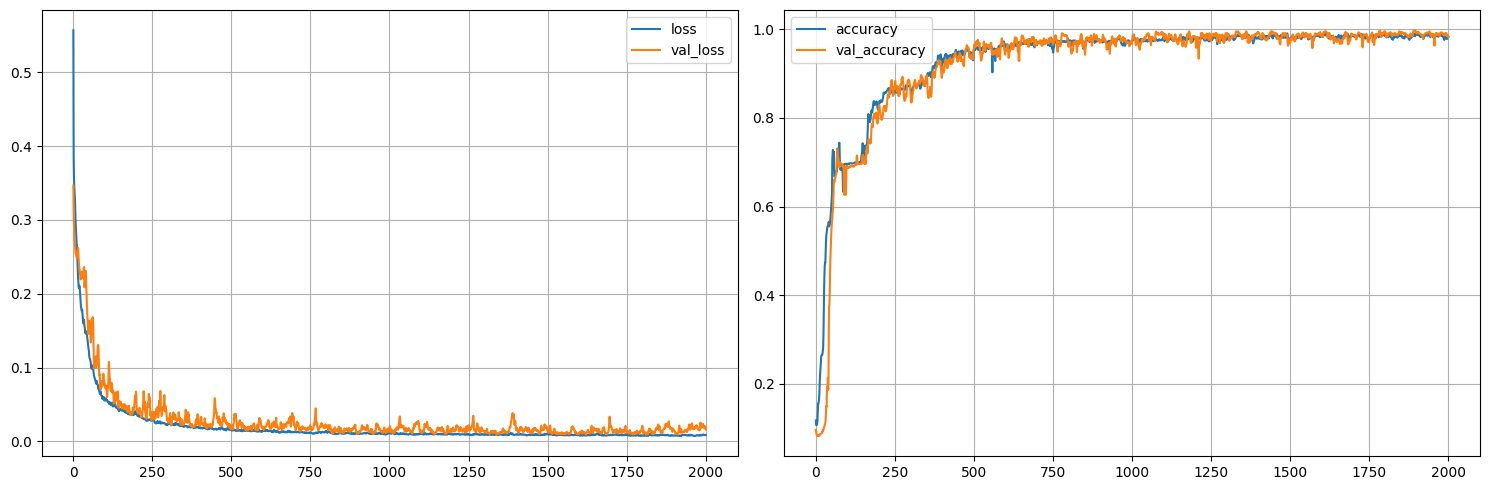


Epoch 2000: val_loss did not improve from 0.00888
6/6 [==============================] - 1s 141ms/step - loss: 0.0085 - accuracy: 0.9827 - val_loss: 0.0160 - val_accuracy: 0.9826


In [72]:
model.compile(loss=WeightedMSE(weights), optimizer=custom_optimizer, metrics=["accuracy"])
model.summary()
model.fit(X, Y, epochs=2000,batch_size = 3000, validation_data = (xVal, yVal), callbacks=callbacks_list)

In [73]:
# # Function to extract the gate model output
# def get_gate_output(model, inputs):
#     # Get the gate outputs from the gate model
#     gate_output = model.gate(inputs)
#     return gate_output.numpy()

# example_input = xVal

# gate_outputs = get_gate_output(model, example_input)

# average_gate_output = np.mean(gate_outputs, axis=0)

# # Plot the average gate outputs for all samples
# def plot_average_gate_outputs(average_gate_output):
#     num_experts = average_gate_output.shape[0]  # Number of experts
    
#     plt.figure(figsize=(10, 6))
#     plt.bar(range(num_experts), average_gate_output)
#     plt.title("Average Gate Output for All Samples")
#     plt.xlabel("Expert Index")
#     plt.ylabel("Average Gate Output (Importance Score)")
#     plt.show()

# # Plot the average gate output
# plot_average_gate_outputs(average_gate_output)


In [74]:
# Define the model architecture (same as when saving)
# model = ...  # Define your model architecture here

# Load the weights into the model
model.load_weights('/kaggle/working/model.h5')


In [75]:
from tensorflow.keras.models import load_model
# Load the model from the .h5 file
modelNew = model
# modelNew = load_model('/kaggle/working/model.h5', custom_objects={'TokenAndPositionEmbedding': TokenAndPositionEmbedding, 'TransformerBlock': TransformerBlock,'CustomLayer':CustomLayer, 'WeightedMSE': WeightedMSE})

In [76]:
modelNew.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 300, 6)]          0         
                                                                 
 batch_normalization_73 (Bat  (None, 300, 6)           24        
 chNormalization)                                                
                                                                 
 token_and_position_embeddin  (None, 300, 6)           0         
 g_15 (TokenAndPositionEmbed                                     
 ding)                                                           
                                                                 
 tf.expand_dims_11 (TFOpLamb  (None, 300, 6, 1)        0         
 da)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 99, 1, 64)         236

In [77]:
np.shape(xTest)
# print(np.shape(X))
# X = np.reshape(x, (-1, 300, 6, 1))

(1853, 300, 6, 1)

In [78]:
# madd_newdoc_ufuncodel.summary()
print(f"size of train data is {len(Y)}, size of test data is {len(yTest)} and validation data is {len(yVal)}")

y = modelNew.evaluate(x = X, y = Y)
print(f"The loss on test data is {y[0]} and accuracy on test data is {y[1]*100}%")

size of train data is 15004, size of test data is 1853 and validation data is 1668
469/469 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 0.9877
The loss on test data is 0.0085696280002594 and accuracy on test data is 98.76699447631836%


58/58 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9870
The loss on test data is 0.011572375893592834 and accuracy on test data is 98.70480298995972%
58/58 [==============================] - 1s 2ms/step
90 1151 0.07819287576020852
0.39636841407199164 0.35563213
-0.3924487579273288 -0.37114856


Text(0, 0.5, 'Phase')

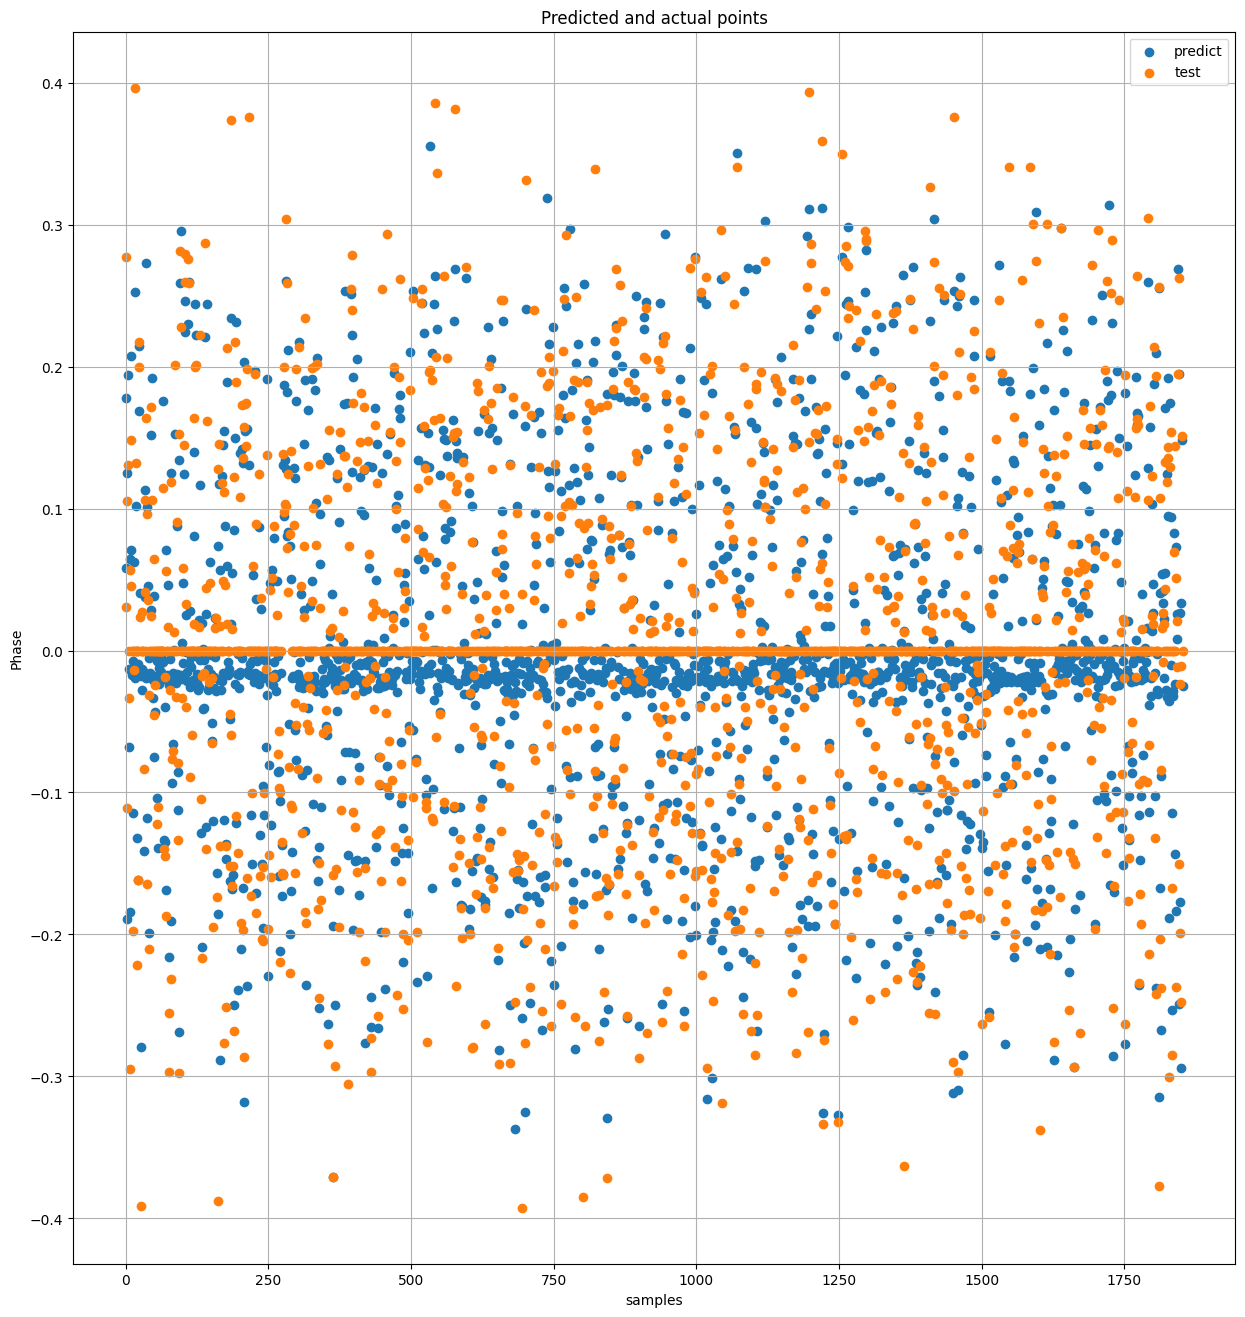

In [79]:
y = modelNew.evaluate(x = xTest, y = yTest)
print(f"The loss on test data is {y[0]} and accuracy on test data is {y[1]*100}%")
# model.save("stateModel")
yPredict = modelNew.predict(xTest)

count = 0
countNew = 0
for i in range(len(yTest)):
    val = yTest[i,4] - yPredict[i,4]
    if abs(val)>0.1:
#         print(yTest[i,4]*100, yPredict[i,4]*100)
        count+=1
    if yTest[i,4] != 0:
        countNew+=1
print(count, countNew, count/countNew)
print(max(yTest[:,4]),max(yPredict[:,4]))
print(min(yTest[:,4]),min(yPredict[:,4]))
plt.figure(figsize = (15,16))
plt.scatter( np.arange(len(yPredict)), yPredict[:,4], label = "predict")
plt.scatter( np.arange(len(yPredict)), yTest[:,4], label = "test")
# plt.scatter( np.arange(len(yPredict)), yTest[:,4]-yPredict[:,4], label = "diff")
# plt.show()

plt.title('Predicted and actual points')
plt.xlabel('samples')
plt.legend()
plt.grid()
plt.ylabel('Phase')

In [80]:
# model.save("stateModel")
yPredict = modelNew.predict(xTest)


58/58 [==============================] - 0s 2ms/step


In [81]:
count = 0
countNew = 0
for i in range(len(yTest)):
    val = yTest[i,4] - yPredict[i,4]
    if abs(val)>0.1:
#         print(yTest[i,4]*100, yPredict[i,4]*100)
        count+=1
    if yTest[i,4] != 0:
        countNew+=1
print(count, countNew, count/countNew)
print(max(yTest[:,4]),max(yPredict[:,4]))
print(min(yTest[:,4]),min(yPredict[:,4]))

90 1151 0.07819287576020852
0.39636841407199164 0.35563213
-0.3924487579273288 -0.37114856


Text(0, 0.5, 'Phase')

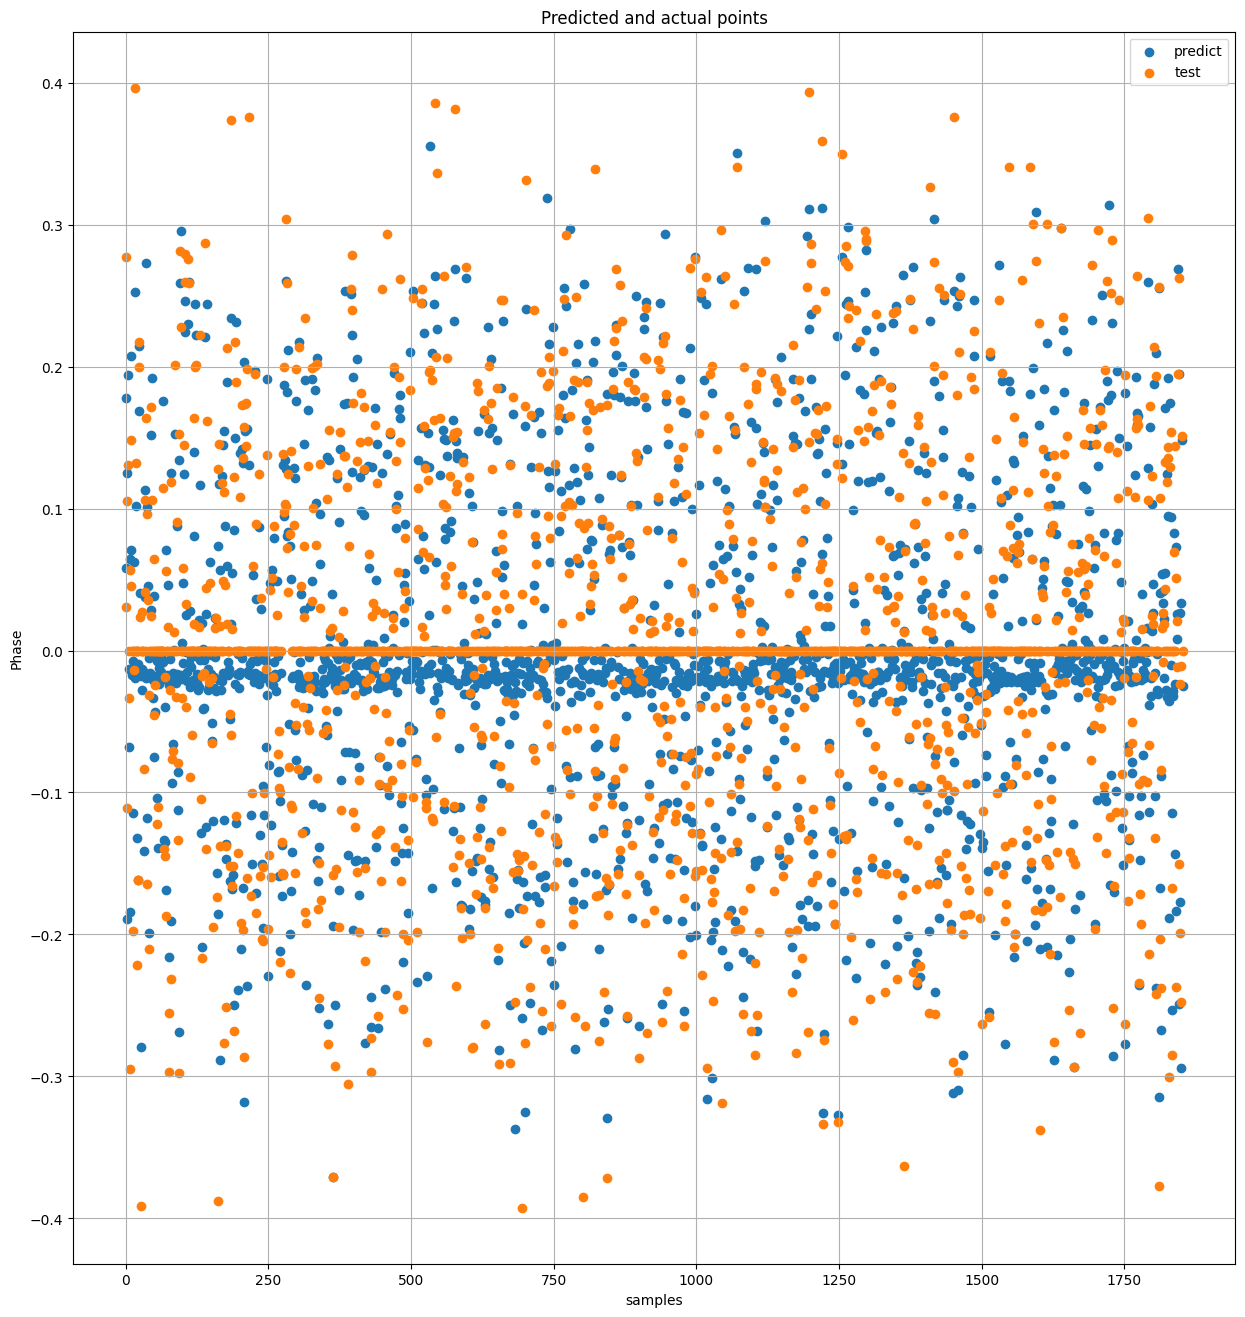

In [82]:
plt.figure(figsize = (15,16))
plt.scatter( np.arange(len(yPredict)), yPredict[:,4], label = "predict")
plt.scatter( np.arange(len(yPredict)), yTest[:,4], label = "test")
# plt.scatter( np.arange(len(yPredict)), yTest[:,4]-yPredict[:,4], label = "diff")
# plt.show()

plt.title('Predicted and actual points')
plt.xlabel('samples')
plt.legend()
plt.grid()
plt.ylabel('Phase')

In [83]:
print(np.sum(abs(yTest[:,4]-yPredict[:,4]))/len(yTest))
print(np.sum(abs(yTest[:,4]-yPredict[:,4])))
yPredictTrain = model.predict(X)
print(np.sum(abs(Y[:,4]-yPredictTrain[:,4]))/len(Y))
print(np.sum(abs(Y[:,4]-yPredictTrain[:,4]))/len(Y)*len(yTest))
print(len(yPredictTrain))

0.03135404637051925
58.099047924572176
469/469 [==============================] - 1s 2ms/step
0.028428791562890642
52.67855076603636
15004


# **Hand Annotated Data**

In [84]:
# def read_and_extract_lists(filepath):
#     with open(filepath, 'r') as file:
#         data = file.read()
#         lists = data.split('],')
#         cleaned_lists = [eval(lst + ']') for lst in lists if lst.strip()]
#     return cleaned_lists

# file_path = '/kaggle/input/handannotateddata/testData.txt'

# res = read_and_extract_lists(file_path)
# ############

# import json

# # Read the dictionary back from the file
# file_path = '/kaggle/input/handannotateddata/data.json'
# with open(file_path, 'r') as file:
#     d = json.load(file)
# di = {}
# for i in d:
#     di[float(i)] = d[i]
# ##############

# import numpy as np
# ans = []
# time = []
# for i in range(len(res)):
#     time.append(res[i][-1])
#     ans.append(res[i][:-1])
    
    
    
    
# plt.plot(di.values())
# plt.show()
# plt.scatter(di.keys(), di.values())
# plt.plot(di.keys(), di.values())


# def labelGen(dic, data):
#     ans = []
#     time = []
#     x = []
#     y = []
#     for i in range(len(data)):
#         time.append(res[i][-1])
#         ans.append(np.reshape(res[i][:-1],(300,6)))
#     for i in range(len(time)):
#         if time[i] in dic:
#             x.append(ans[i])
#             y.append(dic[time[i]])
#     return x, y

# xNew, yNew = labelGen(di, res)







# np.shape(xNew)
# xNew = np.array(xNew)
# yNew = np.array(yNew)
# np.shape(yNew)
# j = np.zeros((len(yNew),5))
# for i in range(len(j)):
#     j[i,4] = yNew[i]
# yNew = j/100


# print(y)
# np.shape(xNew)




# x = np.concatenate([xc[:400][:][:], xr[:400][:][:], xl[:400][:][:], xv[:400][:][:], xNew], 0)########XF REMOVED #######
# # x = np.reshape(x,(-1,300,6,1))##### FOR CNN ONLY #####


# y = np.concatenate([yc[:400][:], yr[:400][:], yl[:400][:], yv[:400][:], yNew], 0)#######YF REMOVED ###########
# print(np.shape(y))

# print(np.shape(x))



# print(np.shape(y))
# # print(np.shape(xNew))
# np.shape(x)


# xTrue, xVal, yTrue, yVal = train_test_split(xNew, yNew, test_size=0.20, shuffle = True)


# # model.summary()
# print(f"size of train data is {len(yTrue)} and validation data is {len(yVal)}")

# yPredict = model.predict(xVal)

# y = model.evaluate(x = xVal, y = yVal)
# print(f"The loss on test data is {y[0]} and accuracy on test data is {y[1]*100}%")




# history = model.fit(xTrue, yTrue, epochs=100,batch_size = 500, validation_data = (xVal, yVal), callbacks=callbacks_list)
# # model.summary()



# # model.summary()
# print(f"size of train data is {len(yTrue)} and validation data is {len(yVal)}")

# yPredict = model.predict(xVal)

# y = model.evaluate(x = xVal, y = yVal)
# print(f"The loss on test data is {y[0]} and accuracy on test data is {y[1]*100}%")

In [85]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = True

tflite_model = converter.convert()

# Save the TFLite model to a file
with open('bestModelLite.tflite', 'wb') as f:
    f.write(tflite_model)

In [86]:
result = []
for x in xTest:
    x = np.reshape(x, (1,300,6))
#     print("hi")
#     b = time.time()
    input_data = np.array(x, dtype=np.int64)#int64

    interpreter = tf.lite.Interpreter(model_path="/kaggle/working/bestModelLite.tflite")
    interpreter.allocate_tensors()
    input_data = np.float32(input_data)#float32
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details() 


    interpreter.resize_tensor_input(input_details[0]['index'], ((len(input_data)), 300,6))
    interpreter.resize_tensor_input(output_details[0]['index'], (len(input_data), 5))
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    y = interpreter.get_tensor(output_details[0]['index']).round(3)
    result.append(y[0])

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [87]:
xAxis = []
yAxis = []
print(yTest[0,4])
for i in range(len(result)):
    if yTest[i,4] != 0:
        xAxis.append(yTest[i,4])
        yAxis.append((yTest[i,4] - result[i][4]))
# print(result[0][4])

len(yTest)

0.2772837289315846


1853

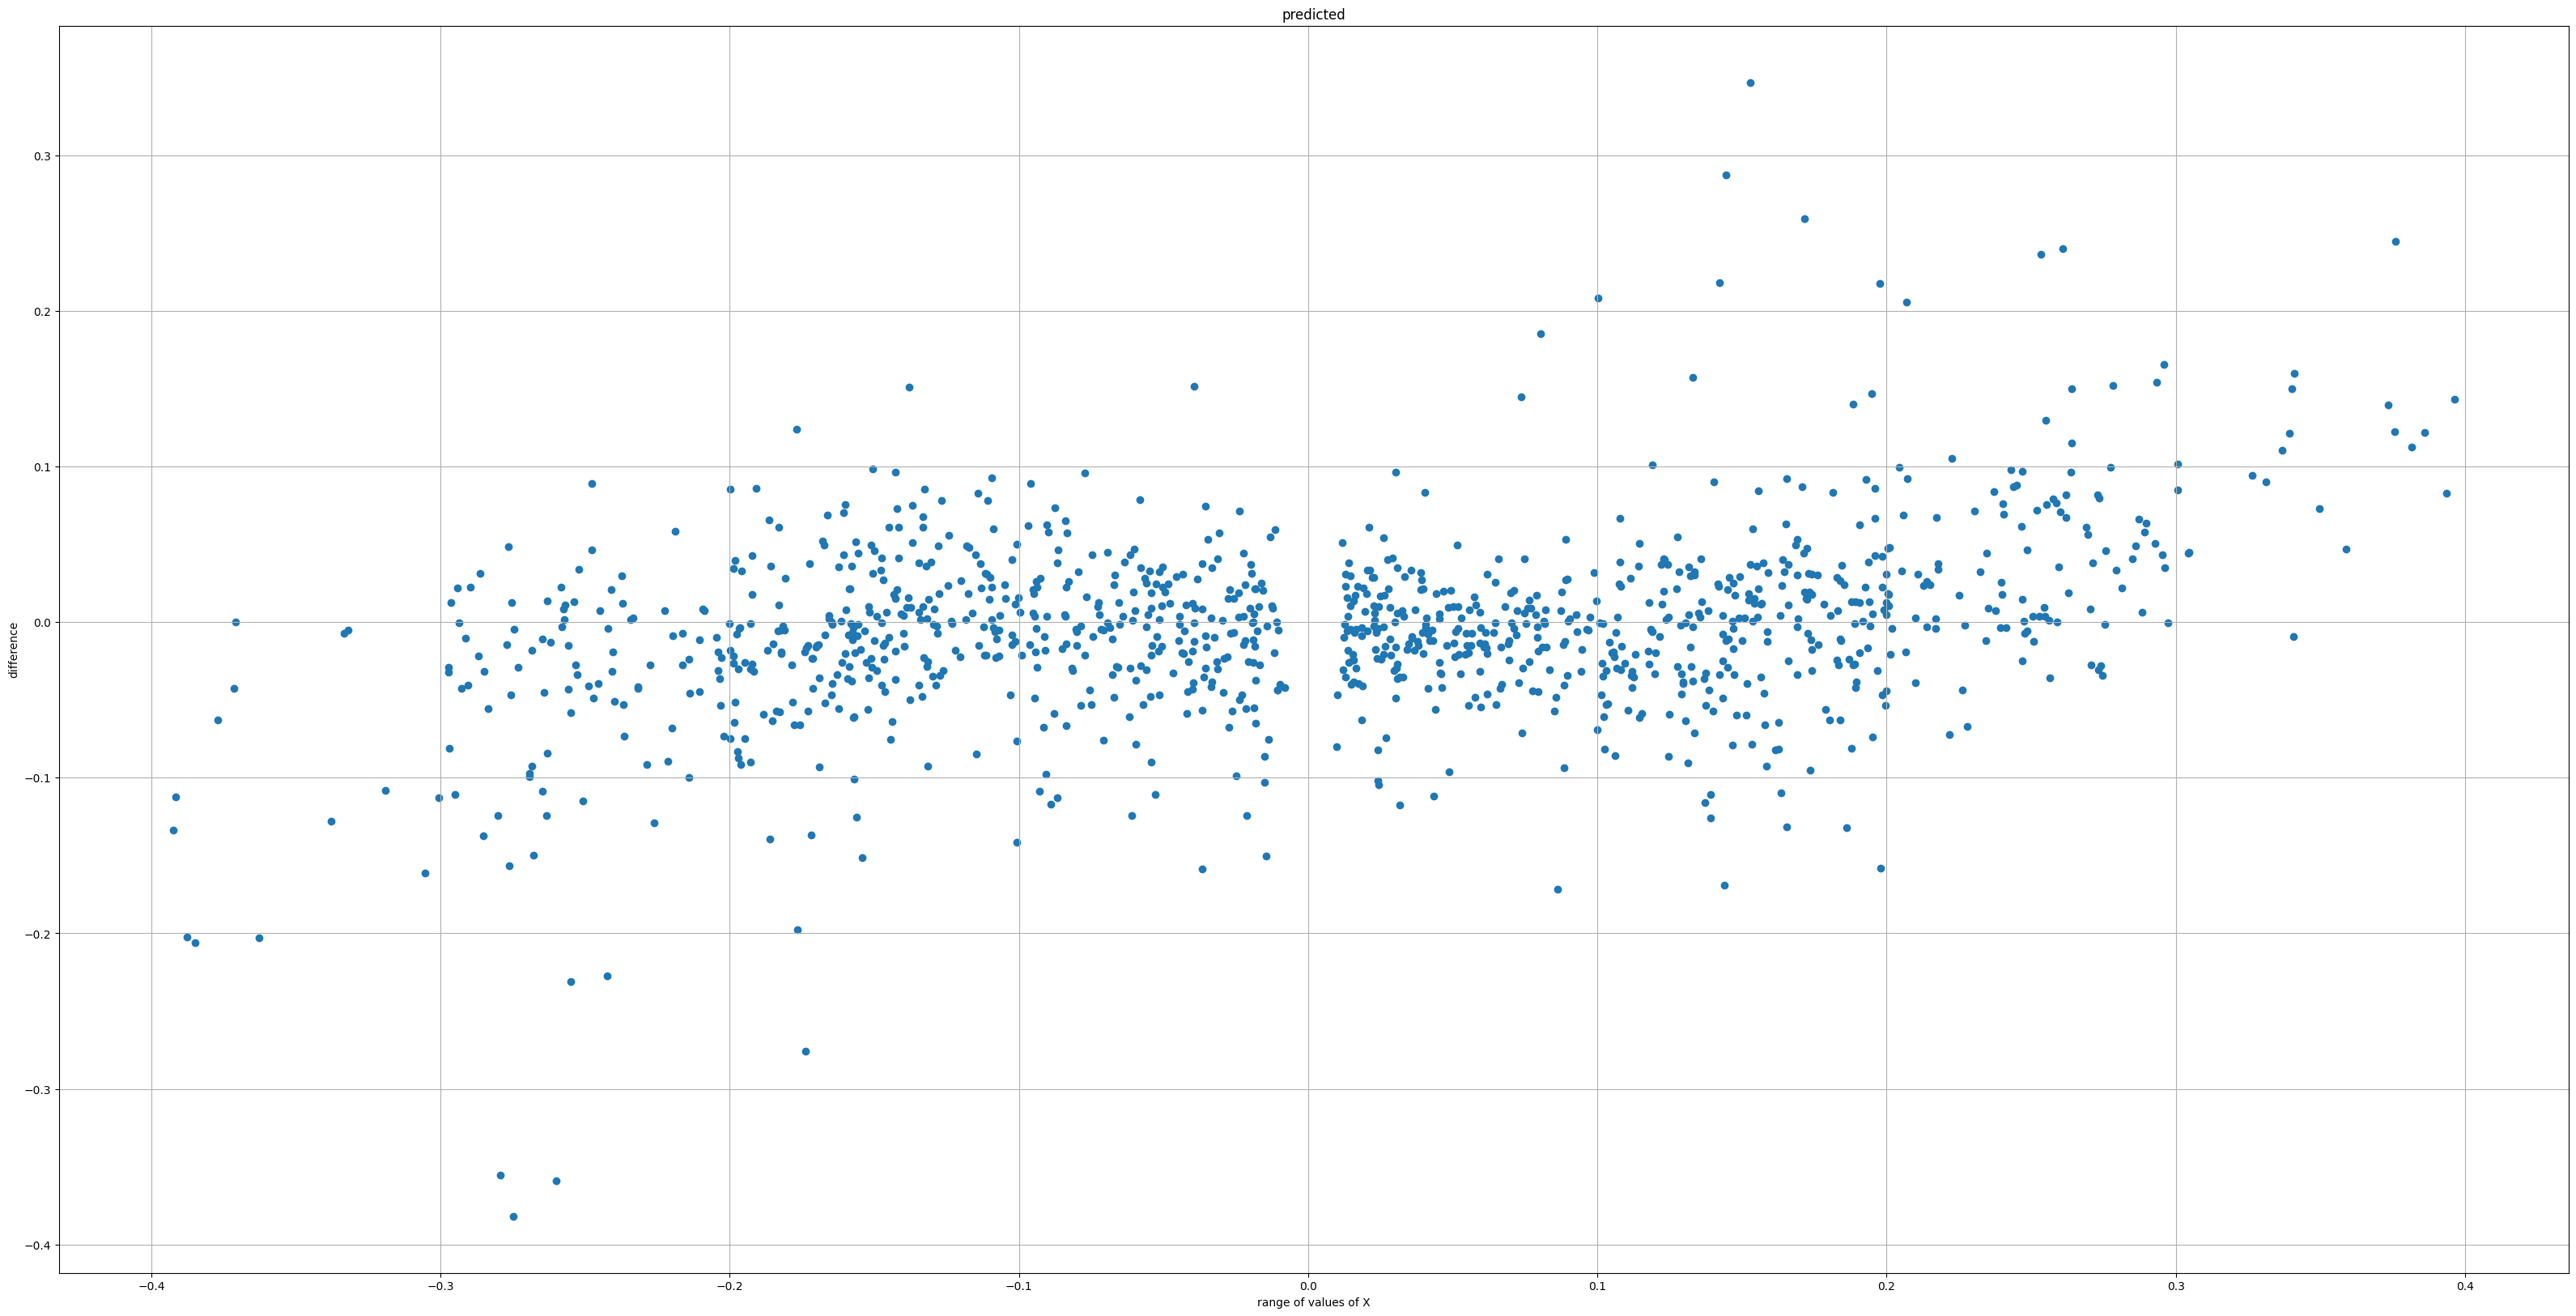

In [88]:
# plt.subplot(2, 1, 2)
plt.scatter(xAxis, yAxis)############################## can remove this range
plt.title('predicted')
plt.xlabel('range of values of X')
plt.ylabel('difference')
plt.grid()
# plt.tight_layout()
plt.show()

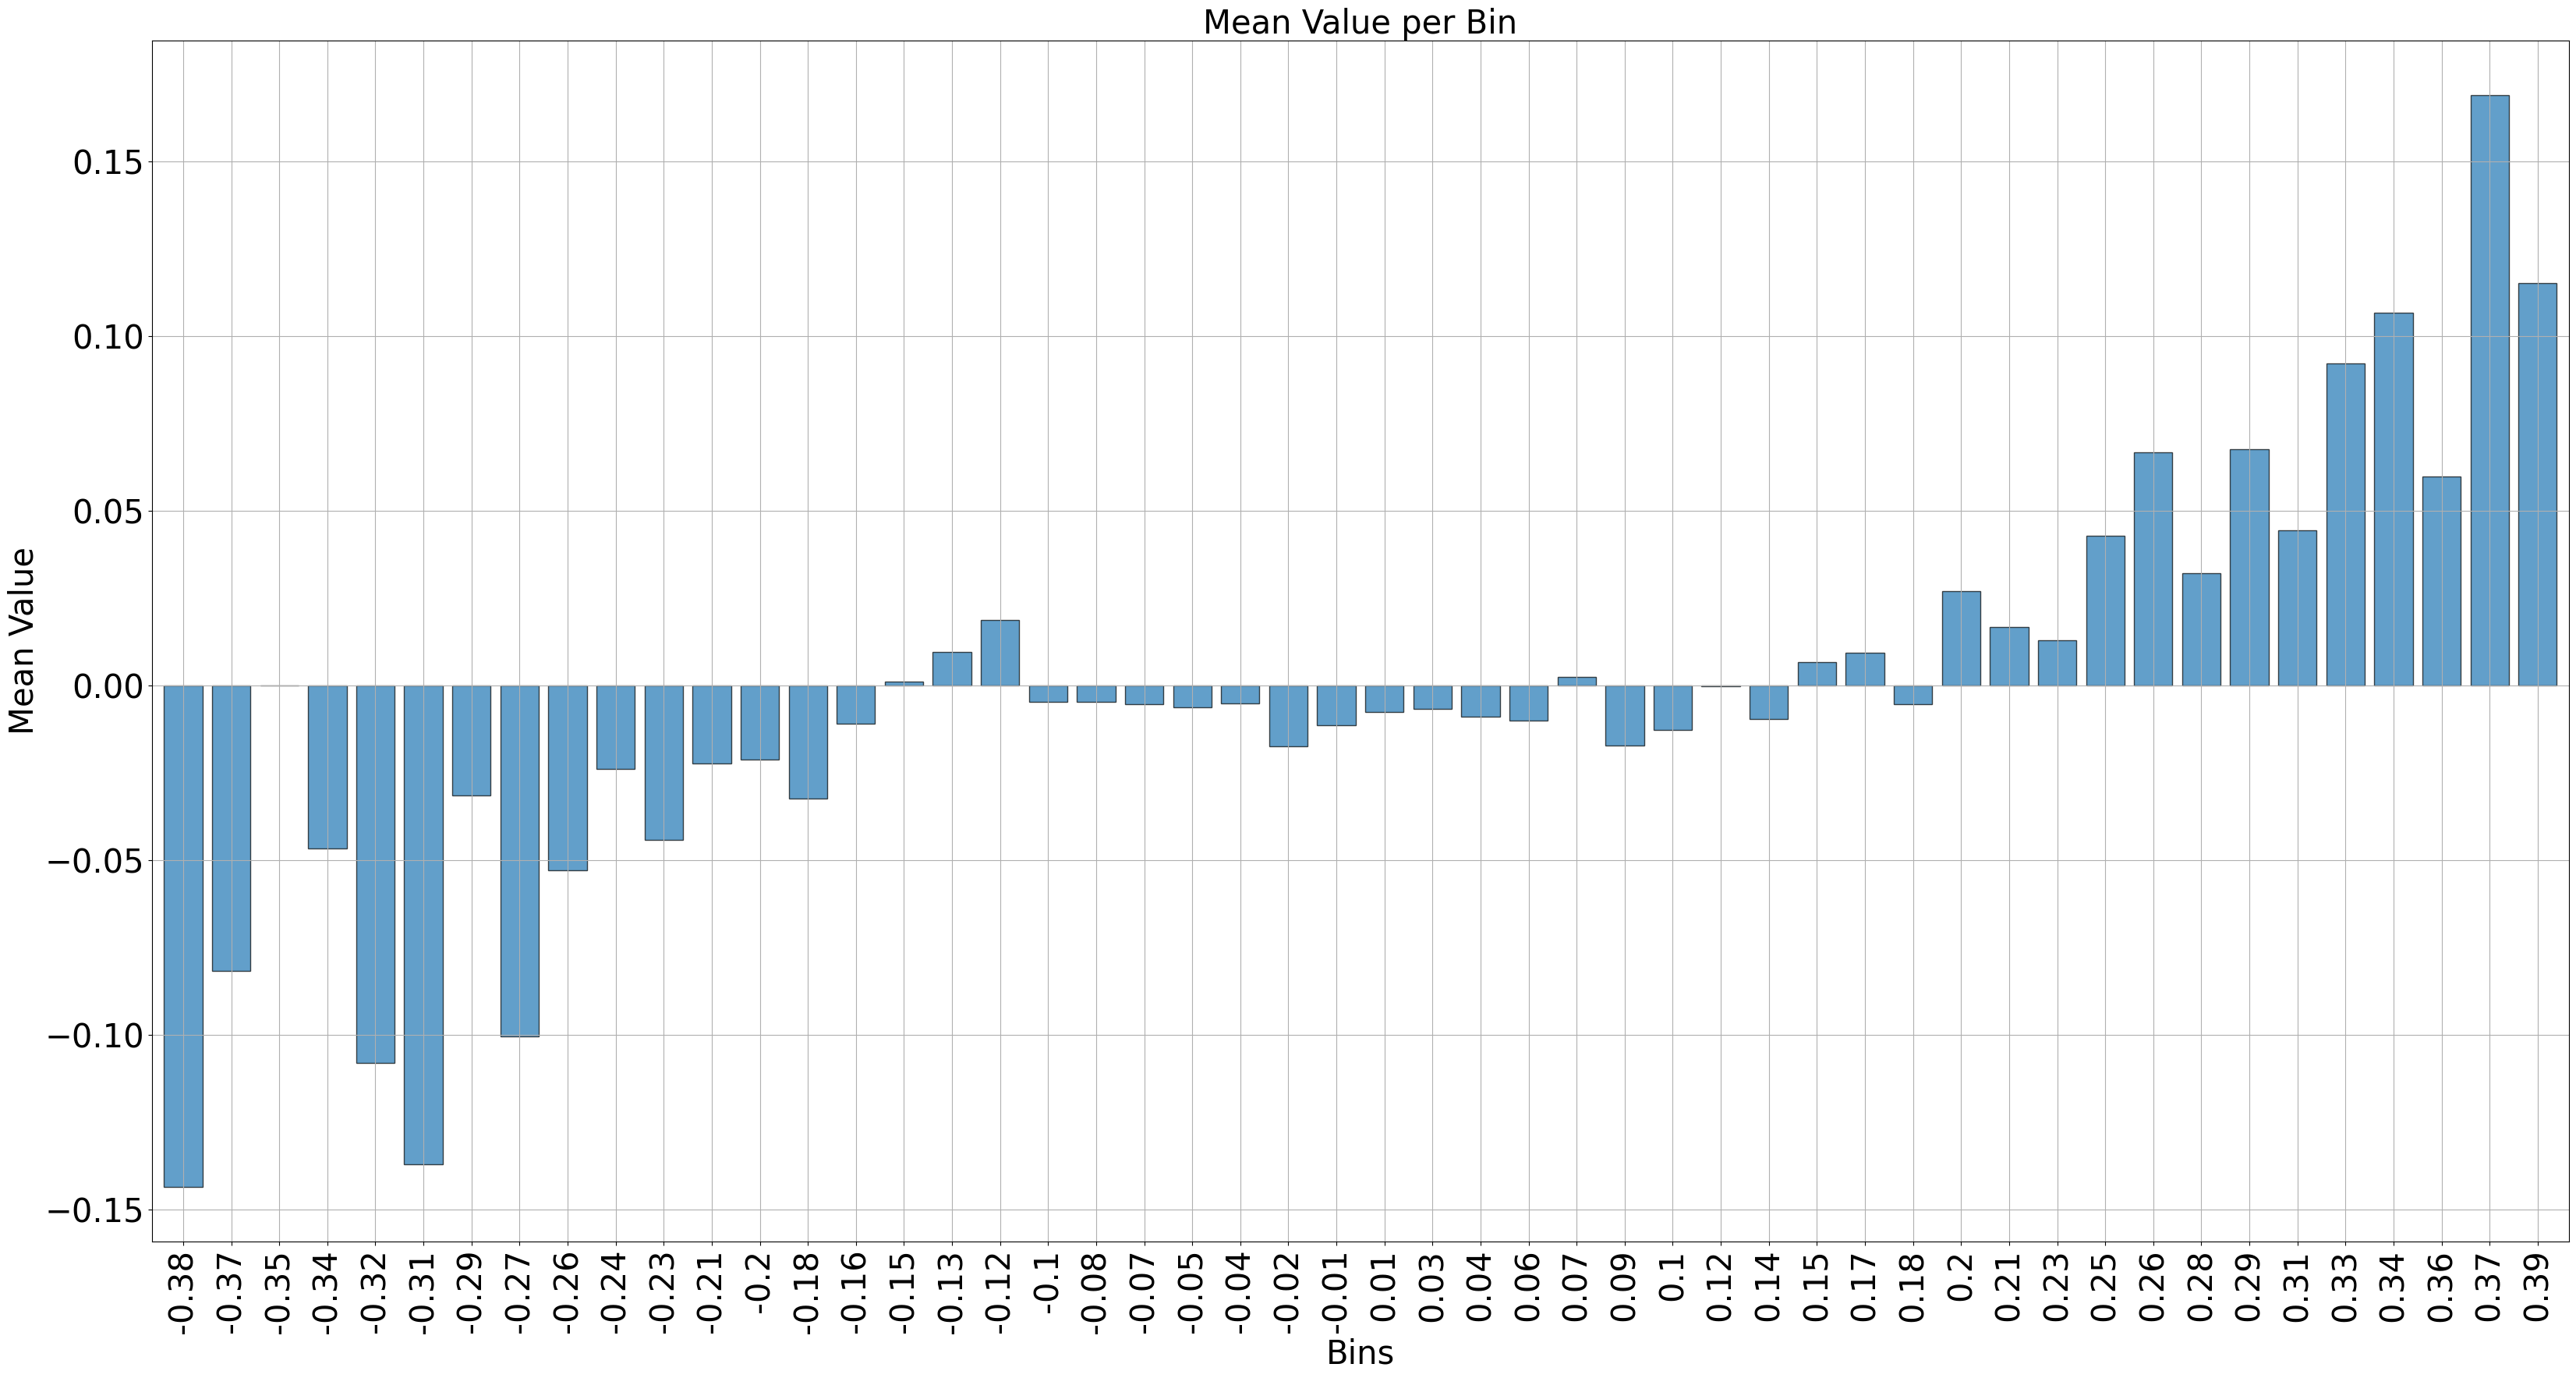

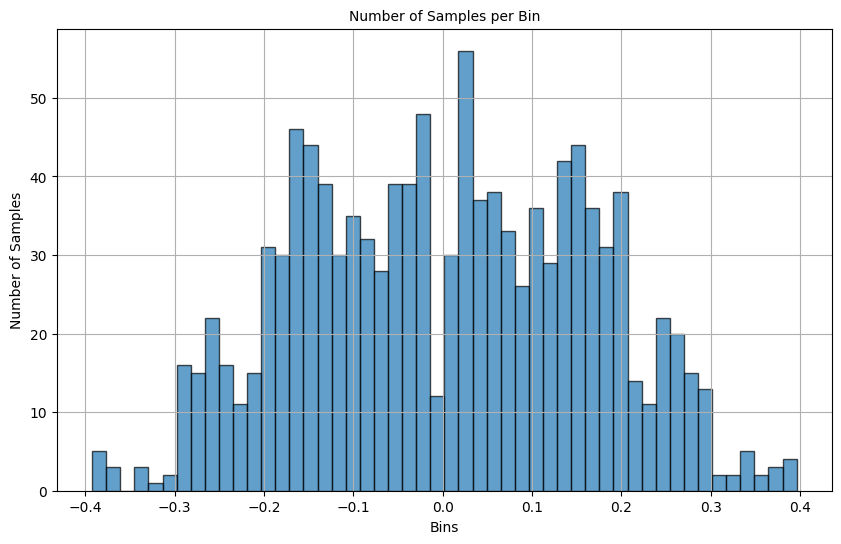

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter

# Create a DataFrame
df = pd.DataFrame({
    'xAxis': xAxis,
    'yAxis': yAxis
})

# Define number of bins
num_bins = 50

# Create bins and labels
bin_edges = np.linspace(df['xAxis'].min(), df['xAxis'].max(), num_bins + 1)
bin_labels = (bin_edges[:-1] + bin_edges[1:]) / 2  # For labeling purposes
# Reduce precision of bin labels
bin_labels = np.round(bin_labels, 2)
# Assign each xAxis value to a bin
df['bins'] = pd.cut(df['xAxis'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Calculate mean yAxis value for each bin
bin_means = df.groupby('bins')['yAxis'].mean()

# Plotting
# plt.figure(figsize=(10, 6))
bin_means.plot(kind='bar', width=0.8, edgecolor='black', alpha=0.7, fontsize = 30)
plt.xlabel('Bins', fontsize = 30)
plt.ylabel('Mean Value', fontsize = 30)
plt.title('Mean Value per Bin', fontsize = 30)
# plt.xticks(rotation=45)

plt.xticks(fontsize = 30) 
plt.grid(True)
# plt.tight_layout()
plt.show()


# Calculate bin edges and bin centers
bin_edges = np.linspace(np.min(xAxis), np.max(xAxis), num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Count the number of samples in each bin
sample_counts = np.histogram(xAxis, bins=bin_edges)[0]

# Plotting the number of samples per bin
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, sample_counts, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
plt.xlabel('Bins', fontsize = 10)
plt.ylabel('Number of Samples', fontsize = 10)
plt.title('Number of Samples per Bin', fontsize = 10)
plt.xticks(fontsize = 10) 
plt.grid(True)
plt.show()


In [ ]:
### Cirriculum Learning ###

In [ ]:
yCirriculum = []
xCirriculum = []
for i in range(len(Y)):
    if abs(Y[i, 4]) >0.2:
        yCirriculum.append(Y[i])
        xCirriculum.append(X[i])
        
yCirriculum = np.array(yCirriculum)
xCirriculum = np.array(xCirriculum)
print(np.shape(yCirriculum), np.shape(xCirriculum))        

In [ ]:
print(f"size of train data is {len(Y)}, size of test data is {len(yTest)} and validation data is {len(yVal)}")

optimizer = keras.optimizers.Adam(learning_rate=0.002, clipvalue=0.5)#


modelNew.compile(loss=WeightedMSE(weights), optimizer=optimizer, metrics=["accuracy"])

modelNew.fit(xCirriculum, yCirriculum, epochs=5,batch_size = 1300, validation_data = (xVal, yVal), callbacks=callbacks_list)
# model.summary()

In [ ]:
def maxval(x):
    ans = []
    for i in x:
        i = list(i)
#         val = np.zeros((4))
        max_index = i.index(max(i))
#         print(max_index)
#         val[max_index] = 1
#         print(val)
        ans.append(max_index)
#     print(ans)
    return ans

pred = maxval(result)
true = maxval(yTest)
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pred)

In [ ]:
# print(np.shape(result))
# print(result[2][:])
# np.shape(result[2][:])
new = []
a = result[:2][0]
print(np.shape(a))
for i in result:
    new.append(i[4])
#     print(i, i[4])
print(new[:2])

In [ ]:
plt.figure(figsize = (15,16))
plt.scatter( np.arange(len(result)), new, label = "predict")
plt.scatter( np.arange(len(yTest)), yTest[:,4], label = "test")
# plt.scatter( np.arange(len(yTest)), yTest[:,4]- new, label = "diff")
# plt.show()

plt.title('Predicted and actual points')
plt.xlabel('samples')
plt.legend()
plt.grid()
plt.ylabel('Phase')

In [ ]:
print(np.sum(abs(yTest[:,4]-new)))

In [ ]:
# print(count, countNew, len(yTest))
print(max(yTest[:,4]),max(new))
print(min(yTest[:,4]),min(new))

In [ ]:
import numpy as np
import pandas as pd
import os.path as path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import scipy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate
import sys   
import struct
import matplotlib.pyplot as plt
from keras.utils import plot_model
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy',min_delta=0.01)
from tensorflow.keras import layers
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
from tensorflow.keras import layers

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []



    def on_epoch_end(self, epoch, logs={}):

        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
callbacks_list = [PlotLearning()]#,early_stopping]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, activations, optimizers

# Dummy implementations for custom functions and layers
class TokenAndPositionEmbedding(layers.Layer):
    def call(self, inputs):
        return inputs  # Replace with actual embedding logic

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class CustomLayer(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.dense = layers.Dense(units, activation='softmax')

    def call(self, inputs):
        return self.dense(inputs)

def WeightedMSE(weights):
    def loss(y_true, y_pred):
        return tf.reduce_mean(weights * tf.square(y_true - y_pred))
    return loss

# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()

print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

embed_dim = 6  # Embedding size for each token
num_heads = 6  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

with strategy.scope():
    inputs = layers.Input(shape=(300, 6))
    embedding_layer = TokenAndPositionEmbedding()
    
    x = layers.BatchNormalization()(inputs)
    x = embedding_layer(x)
    x_skip_attention = x

    for i in range(1):
        x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    x = layers.add([x, x_skip_attention])
    x = tf.expand_dims(x, 3)

    x = layers.Conv2D(32, kernel_size=(6, 6), strides=(3, 3))(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.Conv2D(32, kernel_size=(4, 1), strides=(3, 1))(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.Conv2D(8, kernel_size=(3, 1), strides=(2, 1))(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.Flatten()(x)

    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.Dropout(0.1)(x)
    x_skip1 = x

    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)
    x = layers.Dropout(0.1)(x)
    x_skip2 = x

    x = layers.add([x, x_skip1])
    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.add([x, x_skip2])
    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    x = layers.Dense(16)(x)
    x = layers.BatchNormalization()(x)
    x = activations.sigmoid(x)

    outputs = CustomLayer(5)(x)

    weights = tf.constant([1.0, 1.0, 1.0, 1.0, 1.0])  # Example weights
    optimizer = optimizers.Adam()

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss=WeightedMSE(weights), optimizer=optimizer, metrics=["accuracy"])

# model.summary()

# Dummy dataset for testing
import numpy as np
x_train = np.random.rand(25000, 300, 6).astype(np.float64)
y_train = np.random.randint(0, 5, size=(25000, 5)).astype(np.float64)

# Fit the model
model.fit(X, Y,validation_data = (xVal, yVal), epochs=5, batch_size=3000, callbacks=callbacks_list)
